### Bike Sharing in Washington D.C. Dataset
_Rental bikes in 2011 and 2012 with corresponding weather and seasonal info_

In [1]:
# Import Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# import sidetable as stb
pd.options.display.max_columns = 999

Dataset Source: https://www.kaggle.com/marklvl/bike-sharing-dataset

Dataset characteristics

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
- instant: Record index
- dteday: Date
- season: Season (1:spring, 2:summer, 3:fall, 4:winter)
- yr: Year (0: 2011, 1:2012)
- mnth: Month (1 to 12)
- hr: Hour (0 to 23)
- holiday: whether day is holiday or not (extracted from Holiday Schedule)
- weekday: Day of the week
- workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit: (extracted from Freemeteo)
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

#### Reference Links
- https://www.capitalbikeshare.com/
- https://dchr.dc.gov/page/holiday-schedules-2010-and-2011
- https://dchr.dc.gov/page/holiday-schedules-2012-and-2013
- http://www.freemeteo.com
- https://www.weather.gov/jetstream/beaufort_max
- https://www.bicyclehabitat.com/how-to/a-simple-bike-maintenance-chart-pg366.htm
- http://mobility-workspace.eu/wp-content/uploads/03_Working_Paper_Costs_October_2013.pdf
- https://www.bikenbike.co.id/sepeda-bnb-11/#:~:text=Alloy%20memiliki%20umur%20yang%20lebih,itu%20kekuatan%20akan%20terus%20menurun

In [2]:
df = pd.read_csv('hour.csv',index_col=0)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Problems dan Goals

Every Transportation needs to have maintenance schedule in this case Bicycle. Nowadays Bike Sharing Systems are growing rapidly, the demand of using the systems are also Increasing. Eventually the volume of Bike Sharing Systems are fluctuating from time to time(e.g. Changing hourly, weekly, monthly, and yearly), therefor the maintenance schedule need to be structured and dynamic. The Maintenance Scheduled is adjusted to the trend of the volume of bicycle use, is expected to maximize the life of the bicycle, minimize customer loss due to a shortage of bicycle stock in the field when demand for bicycles is high and maximize income if the demand for bicycle use can always be met, as well as cost efficient.

__Problems__ :

- Bad Maintenance Schedule can affect the lifespan of Bicycles and could increase potential loss of customers (Bike maintenance are related to stock management, since the bicycles are being withdrawn to go under maintenance). When there are many bicycles that must be repaired simultaneously, it indirectly reduces the stock of bicycles in the field and becomes a potential loss of customers).
- The volume of bicycle use in certain seasons (_winter_) is relatively smaller than in other seasons.
- What does the company need to do when there's "SPIKE" in Bike Sharing Demand ?


__Goals__ :
- What __Features/Columns__ affect bike sharing systems.
- Creating a Prediction for Bike Sharing Demand (minimum and maximum) to reduce number of customer loss and predict how many bikes need to be placed in each station each day.
- Creating an effcient Maintenance Schedule to prevent customer loss
- Cost Efficiency


### Data Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [4]:
Desc = []

for i in df.columns:
    Desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum() )/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data = Desc,
            columns = [
                'Column',
                'DataType',
                'Null',
                'Null (%)',
                'nUnique',
                'Unique Samples'
            ])

,Column,DataType,Null,Null (%),nUnique,Unique Samples
0,dteday,object,0,0.0,731,"[2012-04-05, 2011-12-22]"
1,season,int64,0,0.0,4,"[4, 1]"
2,yr,int64,0,0.0,2,"[1, 0]"
3,mnth,int64,0,0.0,12,"[11, 3]"
4,hr,int64,0,0.0,24,"[5, 17]"
5,holiday,int64,0,0.0,2,"[1, 0]"
6,weekday,int64,0,0.0,7,"[3, 6]"
7,workingday,int64,0,0.0,2,"[0, 1]"
8,weathersit,int64,0,0.0,4,"[1, 4]"
9,temp,float64,0,0.0,50,"[0.02, 0.8]"


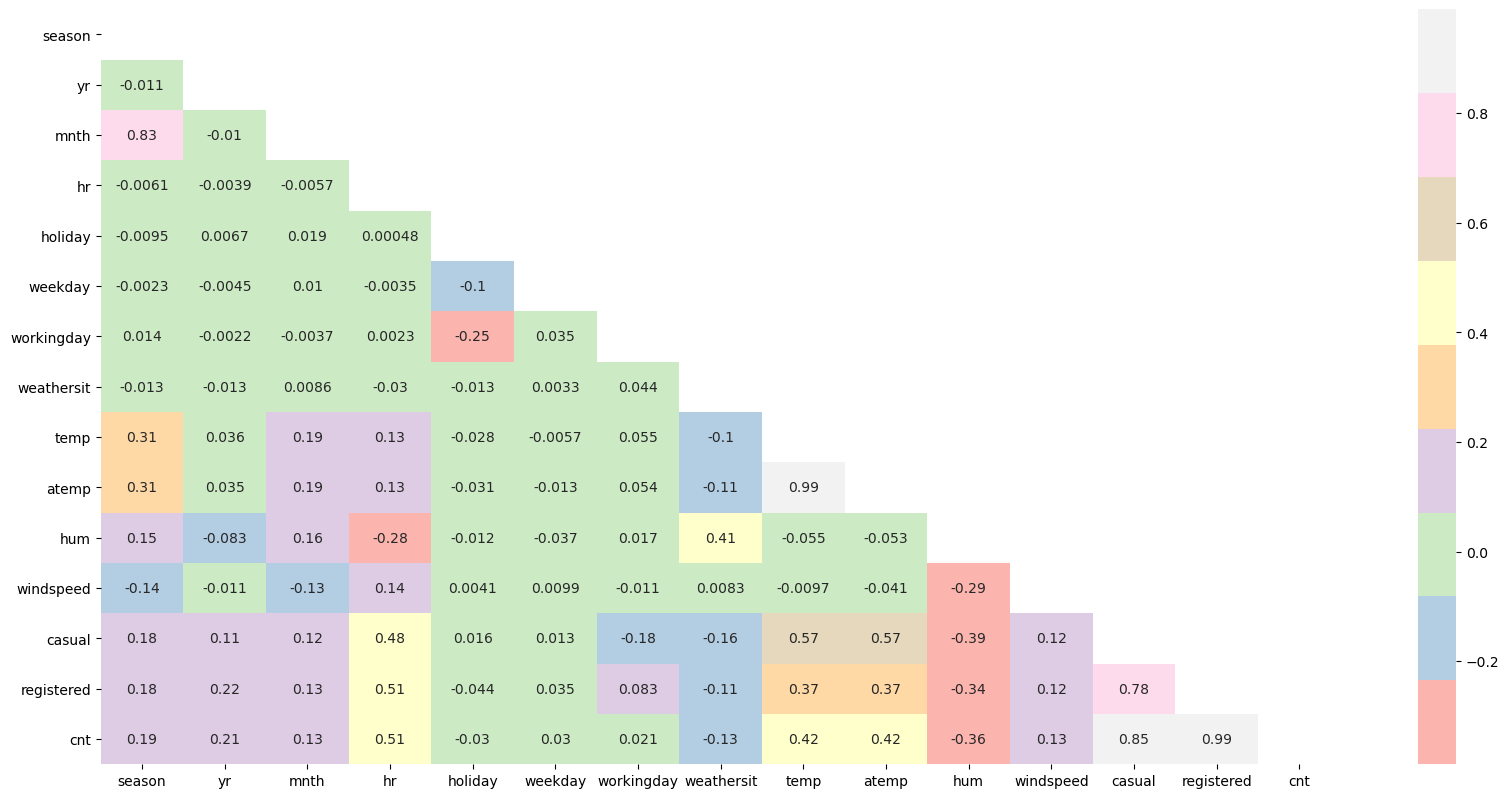

In [5]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(df.corr('spearman'), annot=True, cmap = 'Pastel1', mask=mask)
plt.show()

### Insight
- The Casual column has a correlation of 0.85 . to the cnt column 
- The Registered column has a correlation of 0.99 . to the cnt column
- Because the cnt column is our target column, the Casual and Registered columns are not analyzed further because the correlation value is too high.
- Since the correlation between temp and atemp column is 0.99 we decide to use one of the variable for machine learning and drop the other

### Descriptive Statistics

In [6]:
# Re-Scalling
df['temp']=(df['temp']*(39+8)-8).round(2)
df['atemp']=(df['atemp']*(50+16)-16).round(2)
df['hum']=(df['hum']*100).round(2)
df['windspeed']=(df['windspeed']*67).round(2)

In [7]:
# Numerical Columns
df.drop(columns=['dteday','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']).describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,15.358397,15.401116,62.722884,12.736233,35.676218,153.786869,189.463088
std,9.050138,11.341858,19.292983,8.196891,49.305030,151.357286,181.387599
min,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.980000,6.000000,48.000000,7.000000,4.000000,34.000000,40.000000
50%,15.500000,16.000000,63.000000,13.000000,17.000000,115.000000,142.000000
75%,23.020000,25.000000,78.000000,17.000000,48.000000,220.000000,281.000000
max,39.000000,50.000000,100.000000,57.000000,367.000000,886.000000,977.000000


In [8]:
# Categorical Columns
df['season'] = df['season'].map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})
df['yr'] = df['yr'].map({0:'2011', 1:'2012'})
df['weathersit'] = df['weathersit'].map({1:'Clear', 2:'Cloudy',3:'Light Rain/Snow', 4:'Heavy Rain/Snow'})
df['workingday'] = df['workingday'].map({1:'Work', 0:'Non-Work'})
df['weekday'] = df['weekday'].map({0:'Sunday', 1:'Monday',2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
df['mnth'] = df['mnth'].map({1:'January',2:'February', 3:'March', 4:'April', 5:'May', 6:'June',7:'July',8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
df['hr'] = df['hr'].astype('object')
df['holiday'] = df['holiday'].map({1:'Holiday', 0:'Non-Holiday'})


In [9]:
df.drop(columns=['dteday','temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']).describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
count,17379,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,2,7,2,4
top,Summer,2012,July,17,Non-Holiday,Saturday,Work,Clear
freq,4496,8734,1488,730,16879,2512,11865,11413


### Outliers

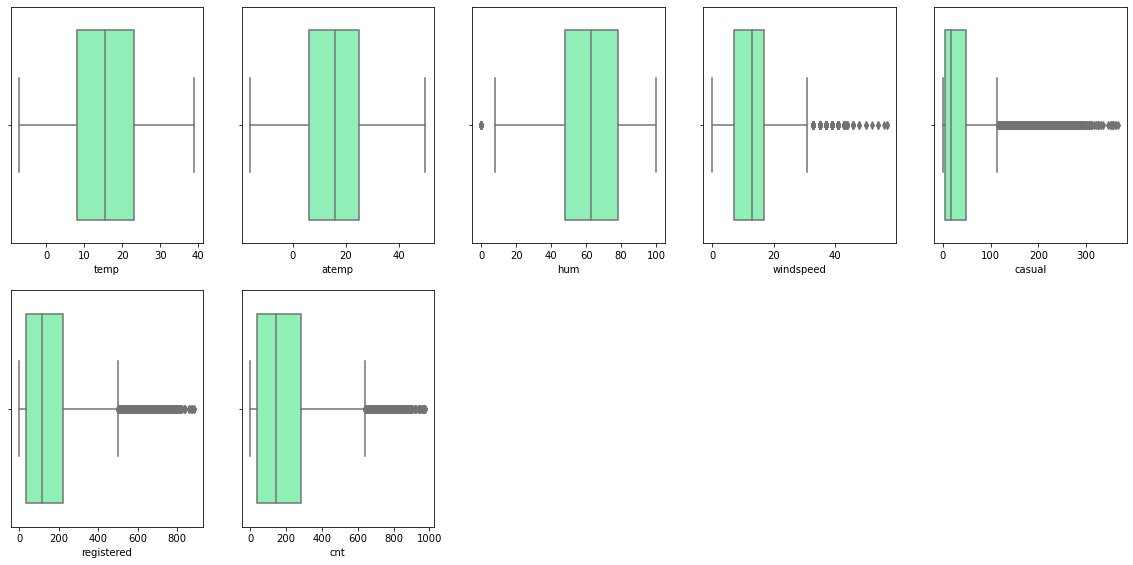

In [10]:
# Outliers by Boxplot
df_describe = df.drop(columns = ['dteday','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

plt.figure(figsize =(20, 20))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(x=df_describe[column], palette='rainbow')
    x+=1
plt.tight_layout
plt.show()

In [11]:
# Outliers by Tabular
Desc_outliers = []

for i in df.drop(columns = ['dteday','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']):
    Q1 = df.describe()[i]['25%']
    Q3 = df.describe()[i]['75%']
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5*IQR)
    lower_fence = Q1 - (1.5*IQR)
    hitung = 0
    
    for j in df[i]:
        if (j < lower_fence) | (j > upper_fence) :
            hitung+=1
    Desc_outliers.append([
        i,
        hitung
    ])
            
# upper_fence, lower_fence
pd.DataFrame(Desc_outliers, columns=[
    "Data Features",
    "Jumlah Outliers"
])


,Data Features,Jumlah Outliers
0,temp,0
1,atemp,0
2,hum,22
3,windspeed,342
4,casual,1192
5,registered,680
6,cnt,505


In [12]:
# Outliers Analysis
Q1 = df['cnt'].describe()['25%']
Q3 = df['cnt'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5*IQR)
lower_fence = Q1 - (1.5*IQR)

df_outliers = df[(df['cnt'] < lower_fence)|(df['cnt'] > upper_fence)]
df_outliers

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
5537,2011-08-23,Summer,2011,August,14,Non-Holiday,Tuesday,Work,Clear,25.84,27.0,30.0,6.0,149,502,651
10359,2012-03-12,Winter,2012,March,17,Non-Holiday,Monday,Work,Cloudy,21.14,25.0,38.0,28.0,87,557,644
10360,2012-03-12,Winter,2012,March,18,Non-Holiday,Monday,Work,Cloudy,20.20,25.0,43.0,13.0,89,623,712
10383,2012-03-13,Winter,2012,March,17,Non-Holiday,Tuesday,Work,Clear,24.90,26.0,37.0,7.0,62,614,676
10384,2012-03-13,Winter,2012,March,18,Non-Holiday,Tuesday,Work,Clear,24.90,26.0,34.0,20.0,96,638,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16886,2012-12-11,Fall,2012,December,8,Non-Holiday,Tuesday,Work,Cloudy,7.98,4.0,61.0,20.0,16,708,724
16910,2012-12-12,Fall,2012,December,8,Non-Holiday,Wednesday,Work,Cloudy,4.22,1.0,65.0,11.0,18,670,688
16934,2012-12-13,Fall,2012,December,8,Non-Holiday,Thursday,Work,Clear,3.28,-1.0,60.0,13.0,24,655,679


In [13]:
df_outliers['dteday'].nunique()

200

#### Insight
- There are 200 dates where cnt is outliers

In [14]:
df['holiday'].value_counts()

Non-Holiday    16879
Holiday          500
Name: holiday, dtype: int64

In [15]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 5537 to 17078
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      505 non-null    object 
 1   season      505 non-null    object 
 2   yr          505 non-null    object 
 3   mnth        505 non-null    object 
 4   hr          505 non-null    object 
 5   holiday     505 non-null    object 
 6   weekday     505 non-null    object 
 7   workingday  505 non-null    object 
 8   weathersit  505 non-null    object 
 9   temp        505 non-null    float64
 10  atemp       505 non-null    float64
 11  hum         505 non-null    float64
 12  windspeed   505 non-null    float64
 13  casual      505 non-null    int64  
 14  registered  505 non-null    int64  
 15  cnt         505 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 67.1+ KB


In [16]:
df_outliers['dteday'][df_outliers['holiday']=='Holiday'].unique()

array(['2012-04-16'], dtype=object)

#### Insight
- Monday, April 16, 2012  DC Emancipation Day

*Note: The legal public holidays for New Year’s Day and Veterans Day are Sunday, January 1, 2012 and Sunday, November 11, 2012, respectively. By law, when the holiday falls on a Sunday, it is observed on the following Monday.

In [17]:
df_outliers['dteday'][df_outliers['holiday']=='Non-Holiday'].unique()

array(['2011-08-23', '2012-03-12', '2012-03-13', '2012-03-14',
       '2012-03-15', '2012-03-17', '2012-03-19', '2012-03-20',
       '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-26',
       '2012-03-27', '2012-03-28', '2012-03-29', '2012-04-02',
       '2012-04-03', '2012-04-04', '2012-04-05', '2012-04-06',
       '2012-04-07', '2012-04-09', '2012-04-10', '2012-04-12',
       '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-17',
       '2012-04-19', '2012-04-20', '2012-04-21', '2012-04-24',
       '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-29',
       '2012-04-30', '2012-05-01', '2012-05-02', '2012-05-03',
       '2012-05-04', '2012-05-07', '2012-05-08', '2012-05-09',
       '2012-05-10', '2012-05-11', '2012-05-12', '2012-05-15',
       '2012-05-16', '2012-05-17', '2012-05-18', '2012-05-19',
       '2012-05-22', '2012-05-23', '2012-05-24', '2012-05-25',
       '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01',
       '2012-06-02', '2012-06-03', '2012-06-04', '2012-

#### Insight
- The Nation’s largest celebration of science and engineering, the USA Science & Engineering Festival, is returning to Washington, D.C., April 28-29, 2012. Adam Savage and Jamie Hyneman, hosts of the Discovery Channel's hit TV series MythBusters, and Bill Nye the Science Guy are among the science superstars signed up to join the Festival Expo at the Walter E. Washington Convention Center and other key locations in the greater District of Columbia area. source : https://www.biospace.com/article/releases/-b-usa-science-and-engineering-festival-b-expands-for-2012-event-in-washington-d-c-/
- The 7th Annual Nations Triathlon to Benefit The Leukemia & Lymphoma Society will take place Sunday, September 9, 2012 in the nations capital, Washington, DC. https://www.trifind.com/re_64972/TheNationsTriathlon.html
- Human Rights Campaign National Dinner : Winston & Strawn served as a bronze level sponsor for the Human Rights Campaign 16th Annual National Dinner, held on October 6, 2012 in Washington, D.C https://www.winston.com/en/who-we-are/firm-profile/diversity/index.html#!/en/thought-leadership/winston-strawn-sponsors-human-rights-campaign-national-dinner.html?aj=ov&parent=5092&idx=26
- Congressional Black Caucus Foundation Legislative Conference https://www.washingtonpost.com/blogs/therootdc/post/congressional-black-caucus-what-to-do-at-the-2012-legislative-conference/2012/09/19/e4126338-0264-11e2-8102-ebee9c66e190_blog.html

#### Conclusion Outliers
- Most outlier occur on the dates of certain events, therefore a new column will be created that indicates if there is an event or not.

In [18]:
df['event'] = df['cnt'].apply(lambda x: 'No' if (x > lower_fence)&(x < upper_fence) else 'Yes')
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,event
instant,,,,,,,,,,,,,,,,,
1,2011-01-01,Winter,2011,January,0,Non-Holiday,Saturday,Non-Work,Clear,3.28,3.0,81.0,0.0,3,13,16,No
2,2011-01-01,Winter,2011,January,1,Non-Holiday,Saturday,Non-Work,Clear,2.34,2.0,80.0,0.0,8,32,40,No
3,2011-01-01,Winter,2011,January,2,Non-Holiday,Saturday,Non-Work,Clear,2.34,2.0,80.0,0.0,5,27,32,No
4,2011-01-01,Winter,2011,January,3,Non-Holiday,Saturday,Non-Work,Clear,3.28,3.0,75.0,0.0,3,10,13,No
5,2011-01-01,Winter,2011,January,4,Non-Holiday,Saturday,Non-Work,Clear,3.28,3.0,75.0,0.0,0,1,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,Winter,2012,December,19,Non-Holiday,Monday,Work,Cloudy,4.22,1.0,60.0,11.0,11,108,119,No
17376,2012-12-31,Winter,2012,December,20,Non-Holiday,Monday,Work,Cloudy,4.22,1.0,60.0,11.0,8,81,89,No
17377,2012-12-31,Winter,2012,December,21,Non-Holiday,Monday,Work,Clear,4.22,1.0,60.0,11.0,7,83,90,No


In [19]:
df['event'].value_counts()

No     16874
Yes      505
Name: event, dtype: int64

df.to_csv('new_hour.csv')

### Exploratory Data Analysis

In [20]:
df = df.drop(columns=['registered','casual'])
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,event
instant,,,,,,,,,,,,,,,
1,2011-01-01,Winter,2011,January,0,Non-Holiday,Saturday,Non-Work,Clear,3.28,3.0,81.0,0.0,16,No
2,2011-01-01,Winter,2011,January,1,Non-Holiday,Saturday,Non-Work,Clear,2.34,2.0,80.0,0.0,40,No
3,2011-01-01,Winter,2011,January,2,Non-Holiday,Saturday,Non-Work,Clear,2.34,2.0,80.0,0.0,32,No
4,2011-01-01,Winter,2011,January,3,Non-Holiday,Saturday,Non-Work,Clear,3.28,3.0,75.0,0.0,13,No
5,2011-01-01,Winter,2011,January,4,Non-Holiday,Saturday,Non-Work,Clear,3.28,3.0,75.0,0.0,1,No


#### Univariate Analysis

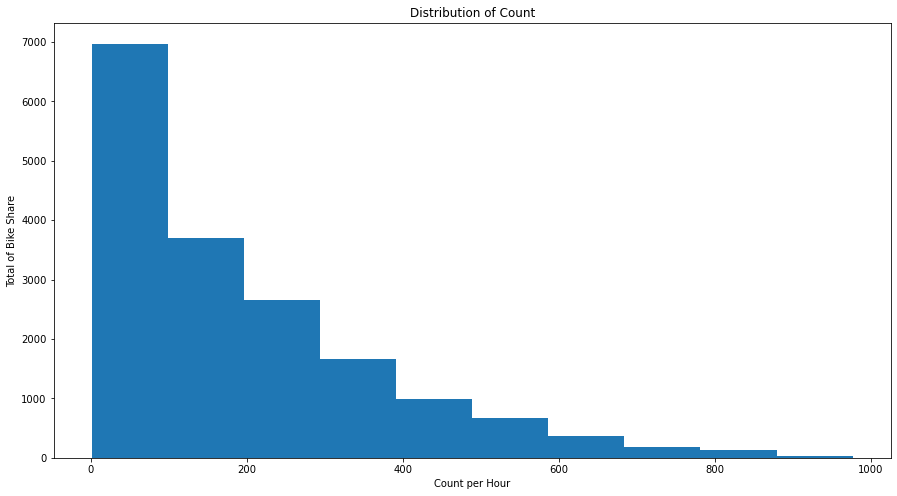

In [21]:
plt.figure(figsize=(15,8))
plt.hist(df["cnt"])
plt.title("Distribution of Count")
plt.ylabel("Total of Bike Share")
plt.xlabel("Count per Hour")
plt.show()

In [22]:
df[['season','cnt']].groupby('season').sum()

,cnt
season,
Fall,841613
Spring,918589
Summer,1061129
Winter,471348


In [23]:
df[['season','cnt']].groupby('season').mean()

,cnt
season,
Fall,198.868856
Spring,208.344069
Summer,236.016237
Winter,111.114569


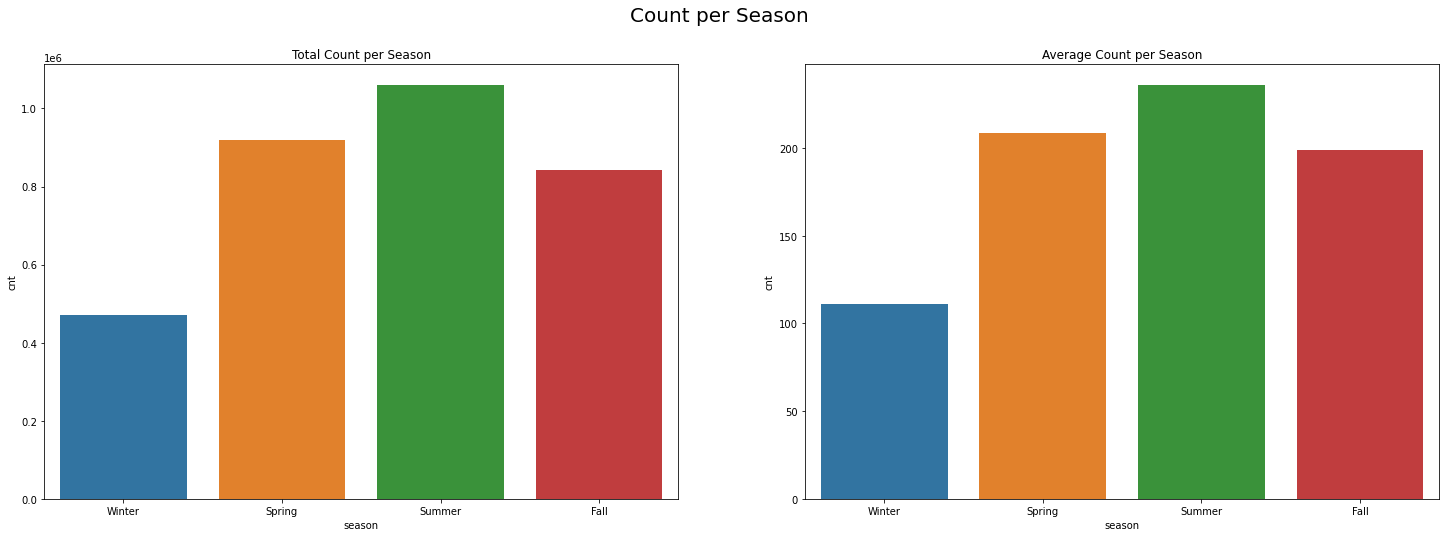

In [24]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Season',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('season','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Season')
plt.subplot(1,2,2)
sns.barplot('season','cnt', data=df, ci=0)
plt.title('Average Count per Season')  
plt.show()

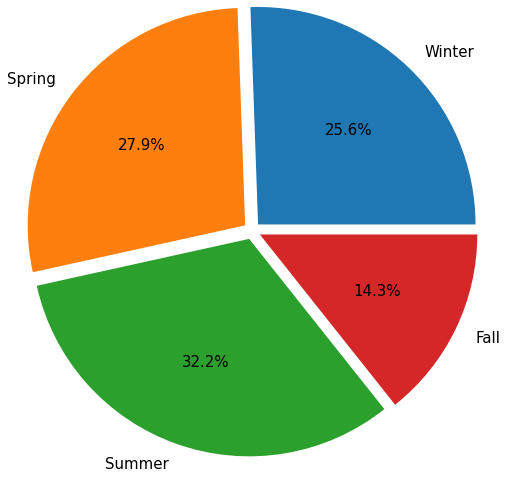

In [25]:
plt.pie(df[['season','cnt']].groupby('season').sum()['cnt'],
        labels=df['season'].unique(), autopct="%1.1f%%", 
        radius=2.5, explode=[0.1,0.1,0.1,0.1], textprops={'fontsize':15})
plt.show()

### Insight
- The most popular season (season with the highest total and average bike demand) is summer.
- There are significant differences of number of bike demand (cnt) among seasons. The highest to the lowest number of bike demands are summer, spring, fall, winter.

In [26]:
df[['yr','cnt']].groupby('yr').sum()

,cnt
yr,
2011,1243103
2012,2049576


In [27]:
df[['yr','cnt']].groupby('yr').mean()

,cnt
yr,
2011,143.794448
2012,234.666361


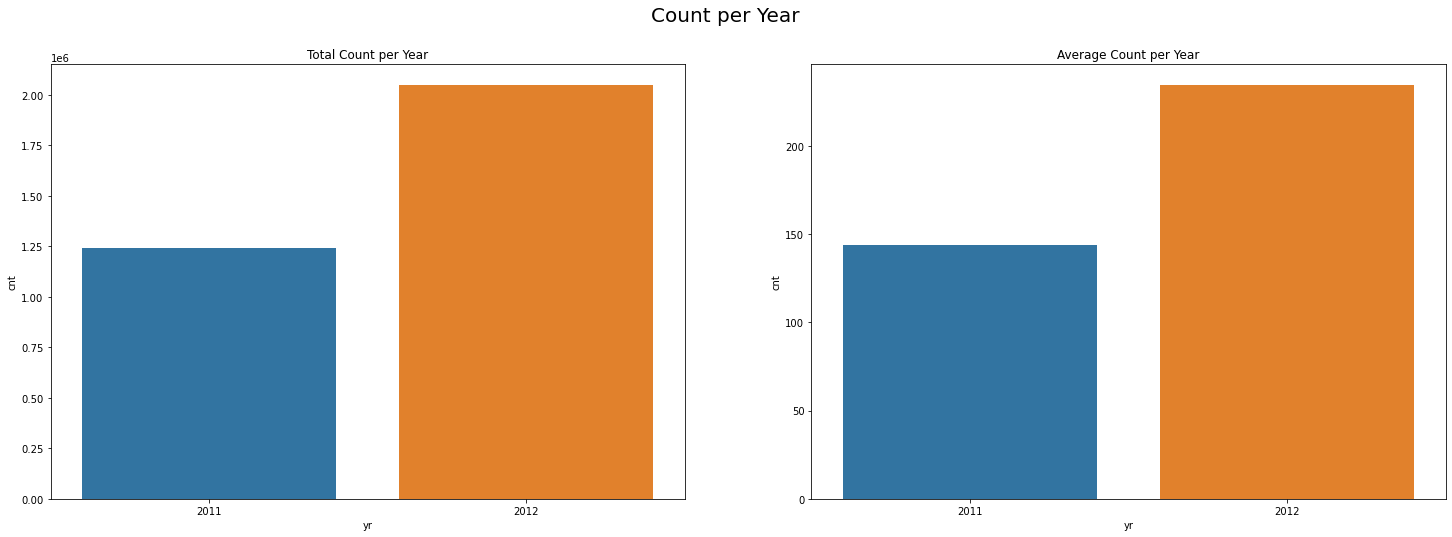

In [28]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Year',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('yr','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Year')
plt.subplot(1,2,2)
sns.barplot('yr','cnt', data=df, ci=0)
plt.title('Average Count per Year')
plt.show()

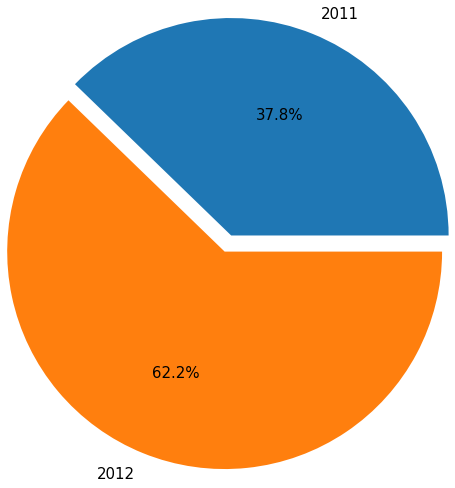

In [29]:
plt.pie(df[['yr','cnt']].groupby('yr').sum()['cnt'],
        labels=df['yr'].unique(), autopct="%1.1f%%", 
        radius=2.5, explode=[0.1,0.1], textprops={'fontsize':15})
plt.show()

### Insight
- The total and the average number of bike sharing demand increase around 60% from 2011 to 2012.

In [30]:
df[['mnth','cnt']].groupby('mnth').sum()

,cnt
mnth,
April,269094
August,351194
December,211036
February,151352
January,134933
July,344948
June,346342
March,228920
May,331686


In [31]:
df[['mnth','cnt']].groupby('mnth').mean()

,cnt
mnth,
April,187.260960
August,238.097627
December,142.303439
February,112.865026
January,94.424773
July,231.819892
June,240.515278
March,155.410726
May,222.907258


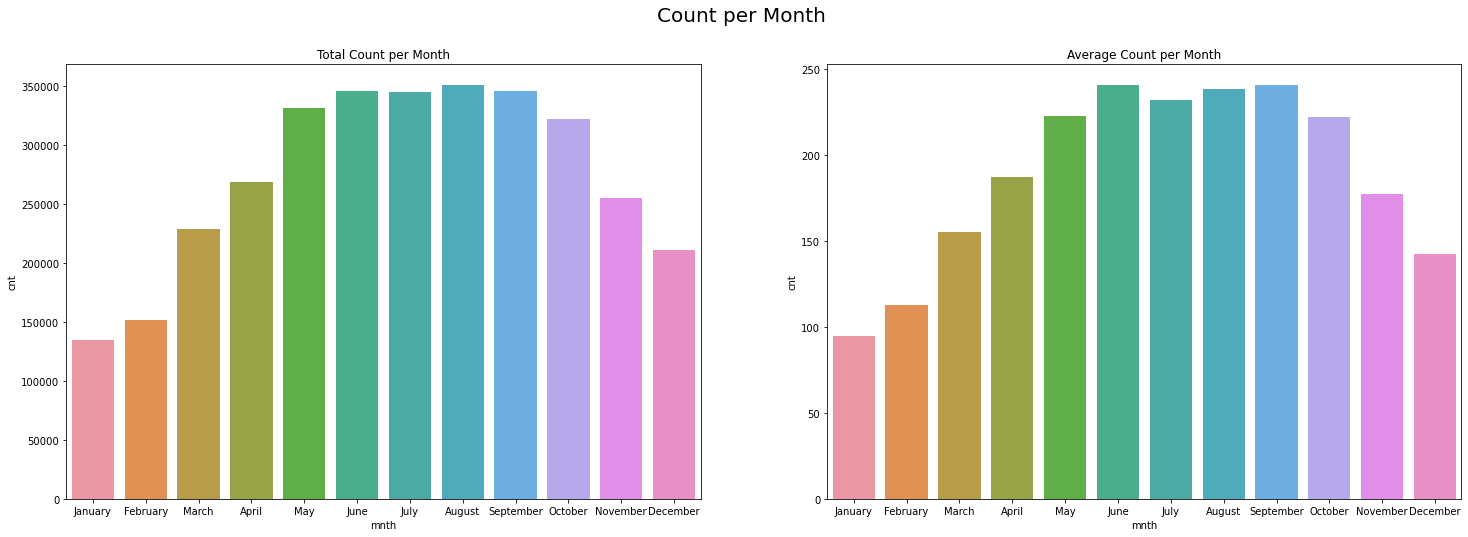

In [32]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Month',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('mnth','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Month')
plt.subplot(1,2,2)
sns.barplot('mnth','cnt', data=df, ci=0)
plt.title('Average Count per Month')
plt.show()

plt.pie(df[['mnth','cnt']].groupby('mnth').sum()['cnt'],
        labels=df['mnth'].unique(), autopct="%1.1f%%", 
        radius=2.5, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,], textprops={'fontsize':15})
plt.show()

### Insight
- The highest total bike sharing demand is 351.194 on August.
- The highest average bike sharing demand is 240,77 on September.
- The number of bike sharing demand (cnt) varies with month.

In [33]:
df[['hr','cnt']].groupby('hr').sum()

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


In [34]:
df[['hr','cnt']].groupby('hr').mean()

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


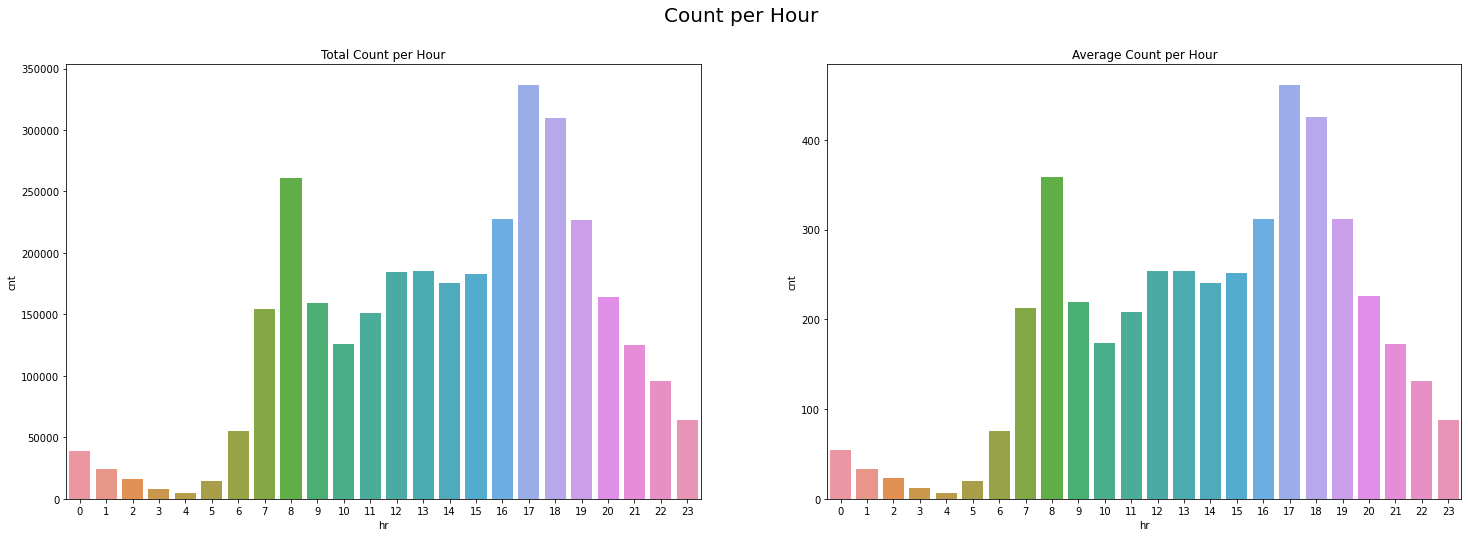

In [35]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Hour',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('hr','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Hour')
plt.subplot(1,2,2)
sns.barplot('hr','cnt', data=df, ci=0)
plt.title('Average Count per Hour')
plt.show()

### Insight
- The highest total and average bike sharing demand happens at the time 08.00 and 17.00.
- The lowest total and average bike sharing demand happens at the time 04.00.
- The number of bike sharing demand (cnt) varies with hr.

In [36]:
df[['holiday','cnt']].groupby('holiday').sum()

,cnt
holiday,
Holiday,78435
Non-Holiday,3214244


In [37]:
df[['holiday','cnt']].groupby('holiday').mean()

,cnt
holiday,
Holiday,156.87000
Non-Holiday,190.42858


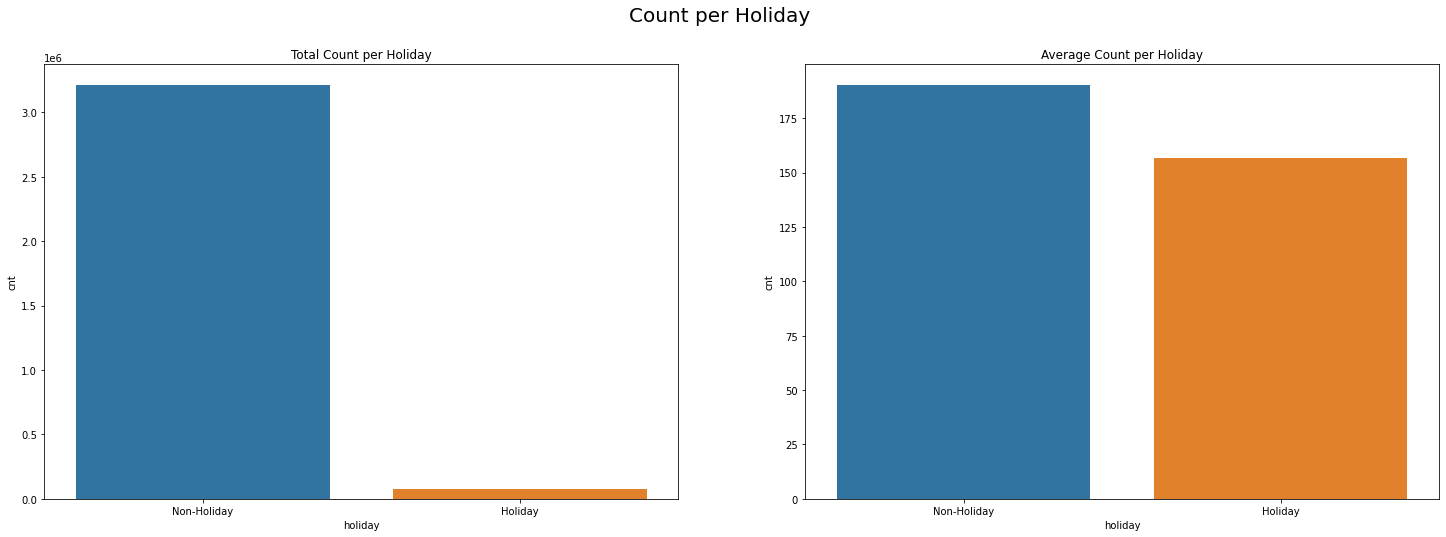

In [38]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Holiday',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('holiday','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Holiday')
plt.subplot(1,2,2)
sns.barplot('holiday','cnt', data=df, ci=0)
plt.title('Average Count per Holiday')
plt.show()

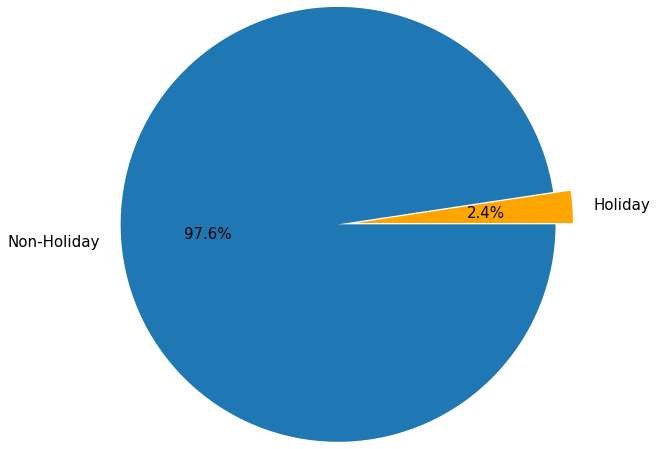

In [39]:
plt.pie(df[['holiday','cnt']].groupby('holiday').sum()['cnt'],
        labels=['Holiday','Non-Holiday'], autopct="%1.1f%%", colors=['orange', None],
        radius=2.5, explode=[0.1,0.1], textprops={'fontsize':15})
plt.show()

### Insight
- The total number of bike demands alot higher on the non-holiday. This due to the fact that the number of holiday date is alot less than non-holiday. But the averages are not too different.
- The number of bike sharing demand (cnt) varies with feature Holiday.

In [40]:
df[['weekday','cnt']].groupby('weekday').sum()

,cnt
weekday,
Friday,487790
Monday,455503
Saturday,477807
Sunday,444027
Thursday,485395
Tuesday,469109
Wednesday,473048


In [41]:
df[['weekday','cnt']].groupby('weekday').mean()

,cnt
weekday,
Friday,196.135907
Monday,183.744655
Saturday,190.209793
Sunday,177.468825
Thursday,196.436665
Tuesday,191.238891
Wednesday,191.130505


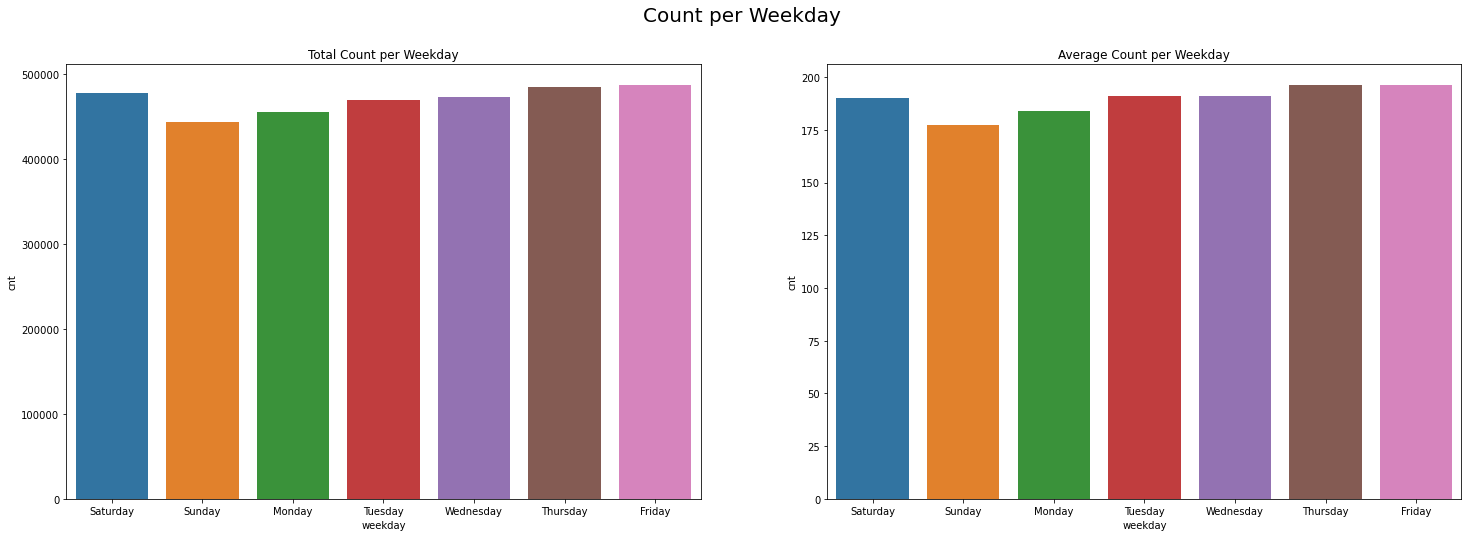

In [42]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Weekday',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('weekday','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Weekday')
plt.subplot(1,2,2)
sns.barplot('weekday','cnt', data=df, ci=0)
plt.title('Average Count per Weekday')
plt.show()

plt.pie(df[['weekday','cnt']].groupby('weekday').sum()['cnt'],
        labels=df['weekday'].unique(), autopct="%1.1f%%", 
        radius=2.5, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1], textprops={'fontsize':15})
plt.show()

### Insight
- The total and average of bike demand does not varies significantly with the feature Weekday.

In [43]:
df[['workingday','cnt']].groupby('workingday').sum()

,cnt
workingday,
Non-Work,1000269
Work,2292410


In [44]:
df[['workingday','cnt']].groupby('workingday').mean()

,cnt
workingday,
Non-Work,181.405332
Work,193.207754


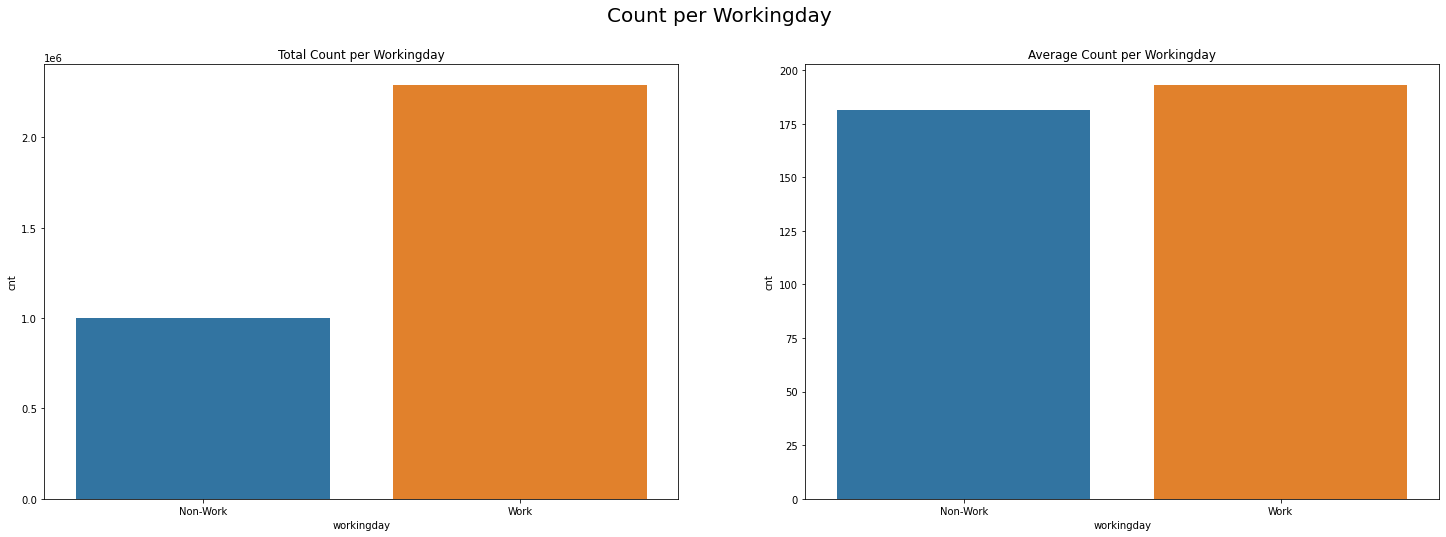

In [45]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Workingday',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('workingday','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Workingday')
plt.subplot(1,2,2)
sns.barplot('workingday','cnt', data=df, ci=0)
plt.title('Average Count per Workingday')
plt.show()

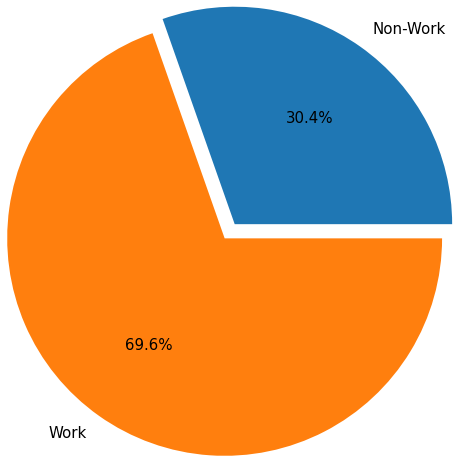

In [46]:
plt.pie(df[['workingday','cnt']].groupby('workingday').sum()['cnt'],
        labels=df['workingday'].unique(), autopct="%1.1f%%", 
        radius=2.5, explode=[0.1,0.1], textprops={'fontsize':15})
plt.show()

### Insight
- The total number of bike demands alot higher on the working day. But on average, there's no significant difference between working and non-working day. 
- The number of bike sharing demand (cnt) does not varies significantly with feature Workingday.

In [47]:
df[['weathersit','cnt']].groupby('weathersit').sum()

,cnt
weathersit,
Clear,2338173
Cloudy,795952
Heavy Rain/Snow,223
Light Rain/Snow,158331


In [48]:
df[['weathersit','cnt']].groupby('weathersit').mean()

,cnt
weathersit,
Clear,204.869272
Cloudy,175.165493
Heavy Rain/Snow,74.333333
Light Rain/Snow,111.579281


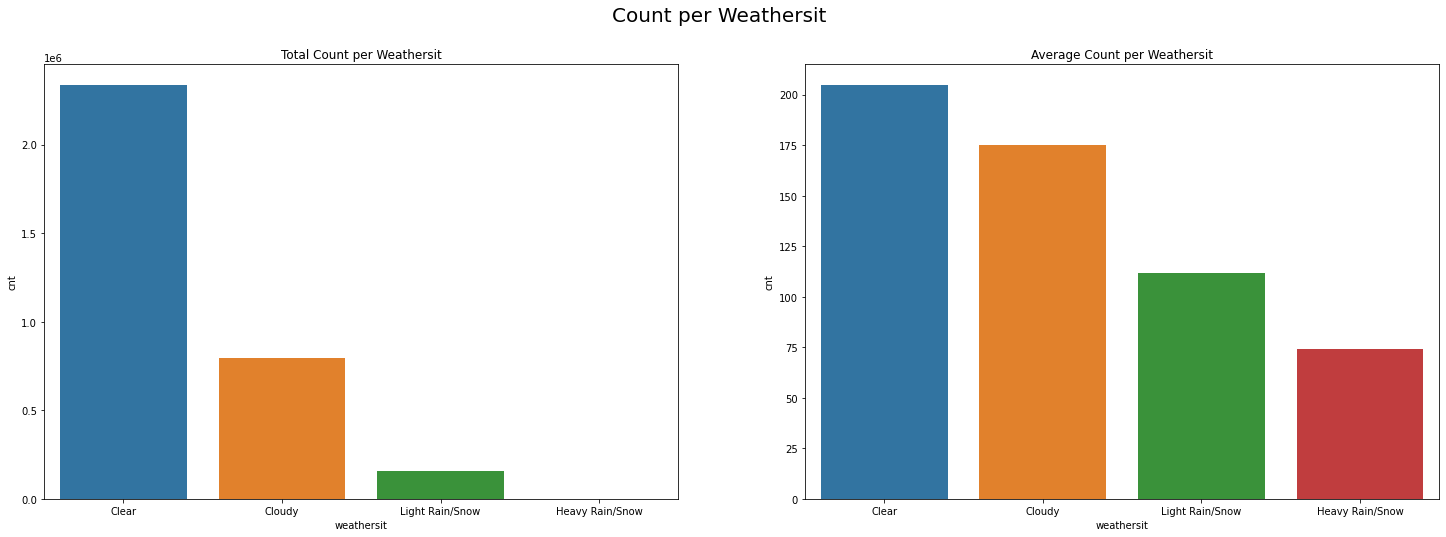

In [49]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Weathersit',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('weathersit','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Weathersit')
plt.subplot(1,2,2)
sns.barplot('weathersit','cnt', data=df, ci=0)
plt.title('Average Count per Weathersit')
plt.show()

plt.pie(df[['weathersit','cnt']].groupby('weathersit').sum()['cnt'],
        labels=['Clear','Cloudy', 'Heavy Rain/Snow','Light Rain/Snow'], autopct="%1.1f%%", 
        radius=2.5, explode=[0.1,0.1,0.1,0.1], textprops={'fontsize':15})
plt.show()

### Insight
- As we expected, the most popular weather is clear.
- The better the weather, the hightest the bike demand. 
- The number of bike demand varies with the weathersit feature.

In [50]:
# Re-Categorize temp
temp_bin = [df['temp'].min()-1,10,20,30,df['temp'].max()]
label_temp = ['Cold', 'Cool', 'Warm','Hot']
df['temp_cat'] = pd.cut(df['temp'], bins=temp_bin, labels=label_temp)

Temperature Category
- Cold = <10 derajat celcius
- Cool = 11-20 derajat celcius
- Warm = 21-30 derajat celcius
- Hot = >30 derajat celcius

In [51]:
df[['temp_cat','cnt']].groupby('temp_cat').sum()

,cnt
temp_cat,
Cold,626084
Cool,949036
Warm,1486229
Hot,231330


In [52]:
df[['temp_cat','cnt']].groupby('temp_cat').mean()

,cnt
temp_cat,
Cold,107.704111
Cool,187.704905
Warm,256.202207
Hot,326.276446


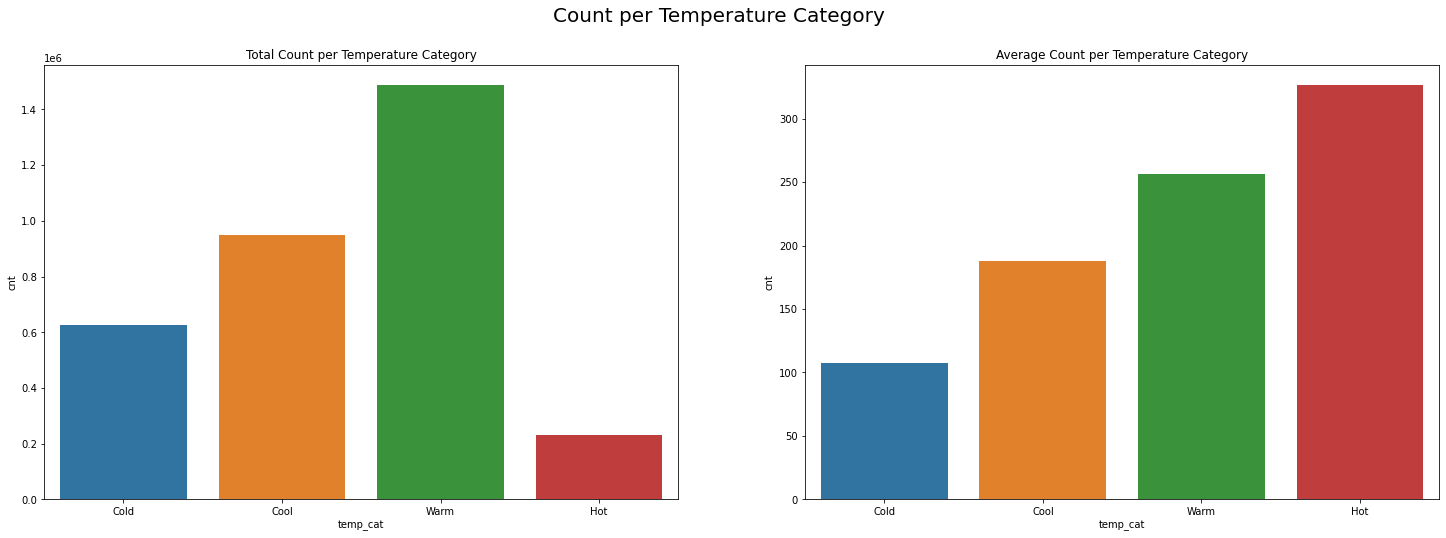

In [53]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Temperature Category',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('temp_cat','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Temperature Category')
plt.subplot(1,2,2)
sns.barplot('temp_cat','cnt', data=df, ci=0)
plt.title('Average Count per Temperature Category')
plt.show()

plt.pie(df[['temp_cat','cnt']].groupby('temp_cat').sum()['cnt'],
        labels=df['temp_cat'].unique(), autopct="%1.1f%%", 
        radius=2.5, explode=[0.1,0.1,0.1,0.1], textprops={'fontsize':15})
plt.show()

### Insight
- The highest total bike demand happens at temperature 21-30 degree Celcius (Warm). Whereas the highest average bike demand happens at temperature >30 degree Celcius (Hot).
- So the bike demand varies with temperature.

In [54]:
# Re-Categorize atemp
atemp_bin = [df['atemp'].min()-1,10,20,30,40,df['atemp'].max()]
label_atemp = ['Cold', 'Cool', 'Warm','Hot','Extreme']
df['atemp_cat'] = pd.cut(df['atemp'], bins=atemp_bin, labels=label_atemp)

Feels-Like-Temperature Category
- Cold = <10 derajat celcius
- Cool = 11-20 derajat celcius
- Warm = 21-30 derajat celcius
- Hot = 31-40 derajat celcius
- Extreme = >40 derajat celcius

In [55]:
df[['atemp_cat','cnt']].groupby('atemp_cat').sum()

,cnt
atemp_cat,
Cold,633232
Cool,974836
Warm,1263879
Hot,402955
Extreme,17777


In [56]:
df[['atemp_cat','cnt']].groupby('atemp_cat').mean()

,cnt
atemp_cat,
Cold,108.485866
Cool,183.550367
Warm,258.250715
Hot,317.537431
Extreme,261.426471


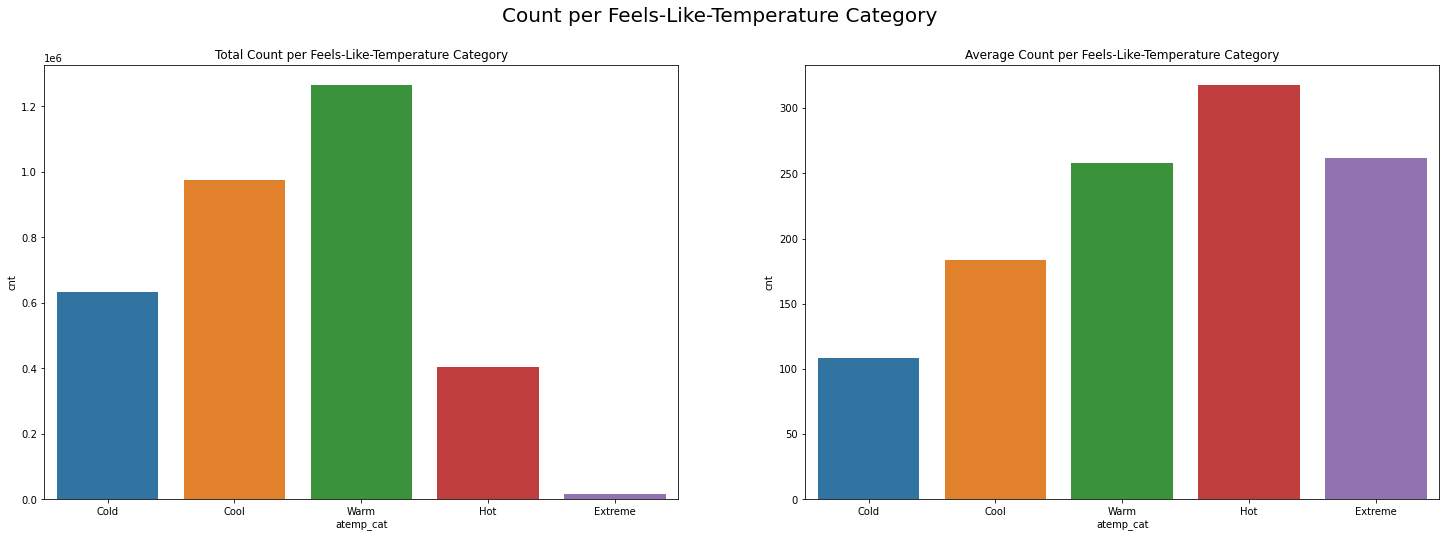

In [57]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Feels-Like-Temperature Category',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('atemp_cat','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Feels-Like-Temperature Category')
plt.subplot(1,2,2)
sns.barplot('atemp_cat','cnt', data=df, ci=0)
plt.title('Average Count per Feels-Like-Temperature Category')
plt.show()

plt.pie(df[['atemp_cat','cnt']].groupby('atemp_cat').sum()['cnt'],
        labels=df['atemp_cat'].unique(), autopct="%1.1f%%", 
        radius=2.5, explode=[0.1,0.1,0.1,0.1,0.1], textprops={'fontsize':15})
plt.show()

### Insight
- The highest total bike demand happens at atemp 21-30 degree Celcius (Warm). Whereas the highest average bike demand happens at atem >30 degree Celcius (Hot).
- So the bike demand varies with atemp feature.


In [58]:
# Re-Categorize hum
hum_bin = [df['hum'].min()-1,30,60,df['hum'].max()]
label_hum = ['Too Dry', 'Optimum', 'Too Moist']
df['hum_cat'] = pd.cut(df['hum'], bins=hum_bin, labels=label_hum)

Humidity Category
- Too Dry = 0-30 %
- Optimum = 31-60 %
- Too Moist = 61-100 %

In [59]:
df[['hum_cat','cnt']].groupby('hum_cat').sum()

,cnt
hum_cat,
Too Dry,223391
Optimum,1704740
Too Moist,1364548


In [60]:
df[['hum_cat','cnt']].groupby('hum_cat').mean()

,cnt
hum_cat,
Too Dry,288.618863
Optimum,236.572301
Too Moist,145.180126


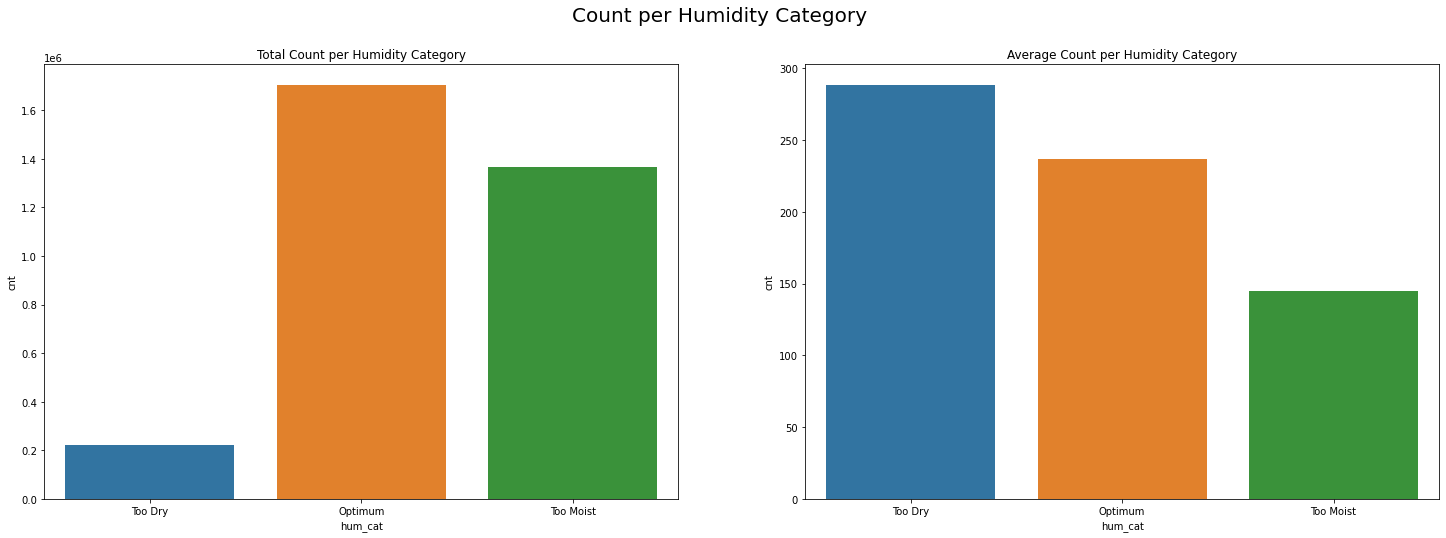

In [61]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Humidity Category',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('hum_cat','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Humidity Category')
plt.subplot(1,2,2)
sns.barplot('hum_cat','cnt', data=df, ci=0)
plt.title('Average Count per Humidity Category')
plt.show()

plt.pie(df[['hum_cat','cnt']].groupby('hum_cat').sum()['cnt'],
        labels=df['hum_cat'].unique(), autopct="%1.1f%%", 
        radius=2.5, explode=[0.1,0.1,0.1], textprops={'fontsize':15})
plt.show()

### Insight
- The highest total bike demand happens at optimum humidity (31-60 %). Whereas the highest average bike demand happens at Too dry category of humidity (0-30 %).
- So the bike demand varies with humidity category.

In [62]:
# Re-Categorize windspeed
wind_bin = [df['windspeed'].min()-1,20,40,df['windspeed'].max()]
label_wind = ['Slow Wind', 'Normal', 'Strong Wind']
df['wind_cat'] = pd.cut(df['windspeed'], bins=wind_bin, labels=label_wind)

Windspeed Category
- Slow Wind = 0-20 km/h
- Normal = 21-40 km/h
- Strong Wind = >40 km/h

In [63]:
df[['wind_cat','cnt']].groupby('wind_cat').sum()

,cnt
wind_cat,
Slow Wind,2801870
Normal,480970
Strong Wind,9839


In [64]:
df[['wind_cat','cnt']].groupby('wind_cat').mean()

,cnt
wind_cat,
Slow Wind,187.090678
Normal,205.542735
Strong Wind,156.174603


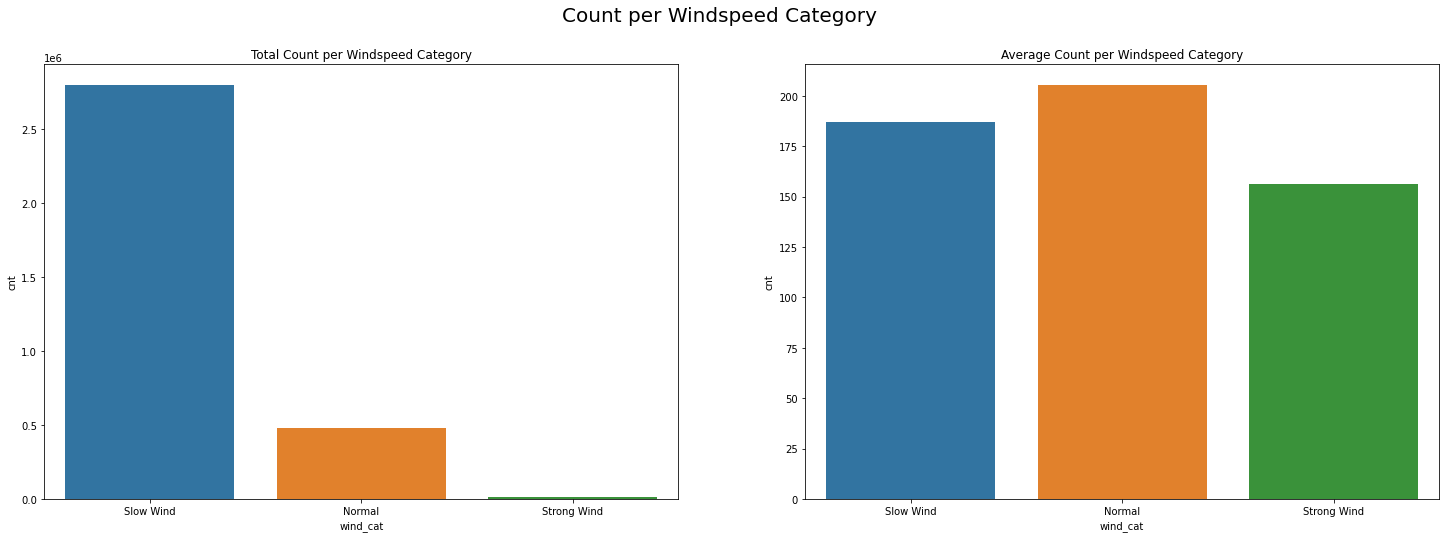

In [65]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Windspeed Category',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('wind_cat','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Windspeed Category')
plt.subplot(1,2,2)
sns.barplot('wind_cat','cnt', data=df, ci=0)
plt.title('Average Count per Windspeed Category')
plt.show()

plt.pie(df[['wind_cat','cnt']].groupby('wind_cat').sum()['cnt'],
        labels=df['wind_cat'].unique(), autopct="%1.1f%%", 
        radius=2.5, explode=[0.1,0.1,0.1], textprops={'fontsize':15})
plt.show()

### Insight
- The highest total bike demand happens at slow winspeed (0-20 km/h). Whereas the highest average bike demand happens at normal winspeed (21-40 km/h).
- So the bike demand varies with windspeed category.

In [66]:
df[['event','cnt']].groupby('event').sum()

,cnt
event,
No,2914311
Yes,378368


In [67]:
df[['event','cnt']].groupby('event').mean()

,cnt
event,
No,172.710146
Yes,749.243564


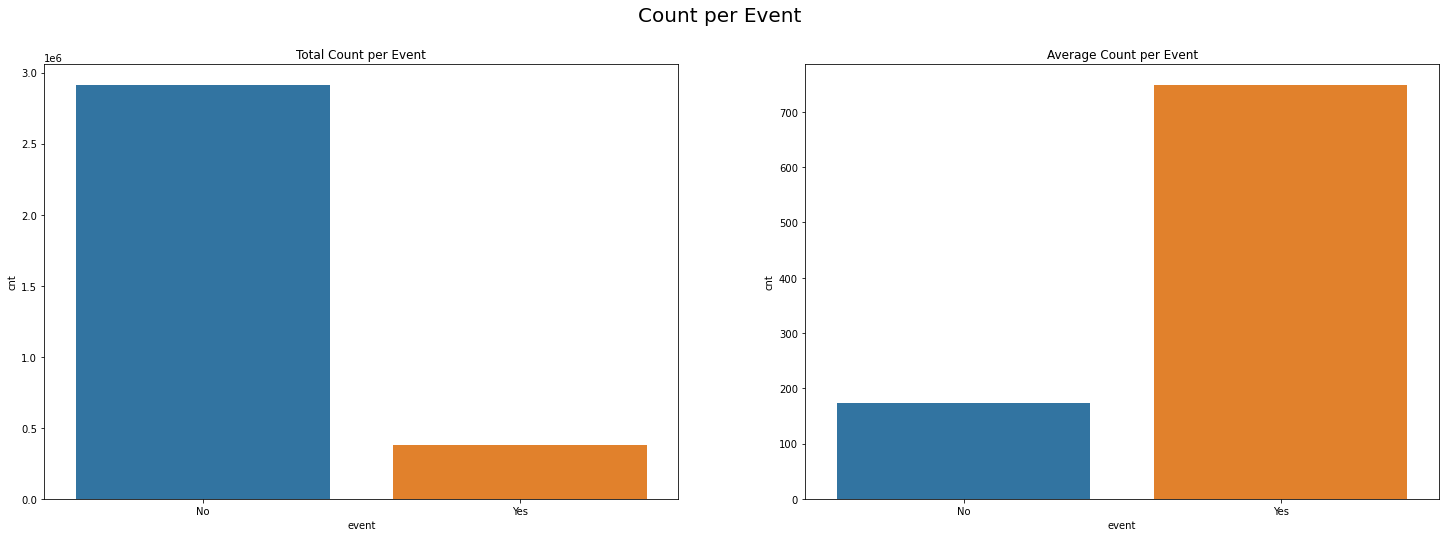

In [68]:
plt.figure(figsize=(25,8))
plt.suptitle('Count per Event',fontsize=20)
plt.subplot(1,2,1)
sns.barplot('event','cnt', data=df, estimator=sum, ci=0)
plt.title('Total Count per Event')
plt.subplot(1,2,2)
sns.barplot('event','cnt', data=df, ci=0)
plt.title('Average Count per Event')
plt.show()

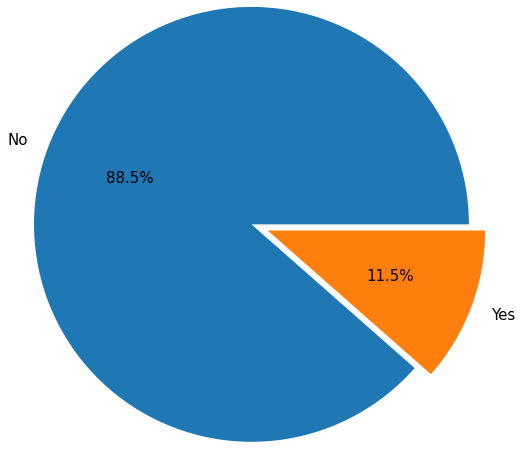

In [69]:
plt.pie(df[['event','cnt']].groupby('event').sum()['cnt'],
        labels=df['event'].unique(), autopct="%1.1f%%", 
        radius=2.5, explode=[0.1,0.1], textprops={'fontsize':15})
plt.show()

### Insight
- In total, the number of bike demand when there is an event is less than when there's no event. But on average, the number of bike demand is alot higher when there's an event.
- The number of bike demand varies with event feature.

### Multivariate Analysis

In [70]:
pd.crosstab(index=df['season'], columns=df['hr'], values=df['cnt'], aggfunc='sum', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
season,,,,,,,,,,,,,,,,,,,,,,,,,
Fall,9971,6322,4159,2052,1279,3976,14376,40763,69757,42142,32994,39841,49573,49066,47084,49528,61402,86050,75428,52575,37549,28555,21871,15300,841613
Spring,10459,6481,4302,2084,1118,3508,14549,40753,69945,43053,34919,42585,51252,52022,48903,51382,63831,95468,88904,65994,47285,35246,26885,17661,918589
Summer,13822,8132,5716,2930,1541,4947,18946,52000,79204,47927,40405,47319,56458,55656,53060,54221,69516,107562,102330,78383,58505,45147,34416,22986,1061129
Winter,4878,3229,2175,1108,490,1830,7261,20655,42095,26316,17939,21575,27131,28175,26605,28018,32999,47780,43110,29837,21211,16497,12440,7994,471348
All,39130,24164,16352,8174,4428,14261,55132,154171,261001,159438,126257,151320,184414,184919,175652,183149,227748,336860,309772,226789,164550,125445,95612,63941,3292679


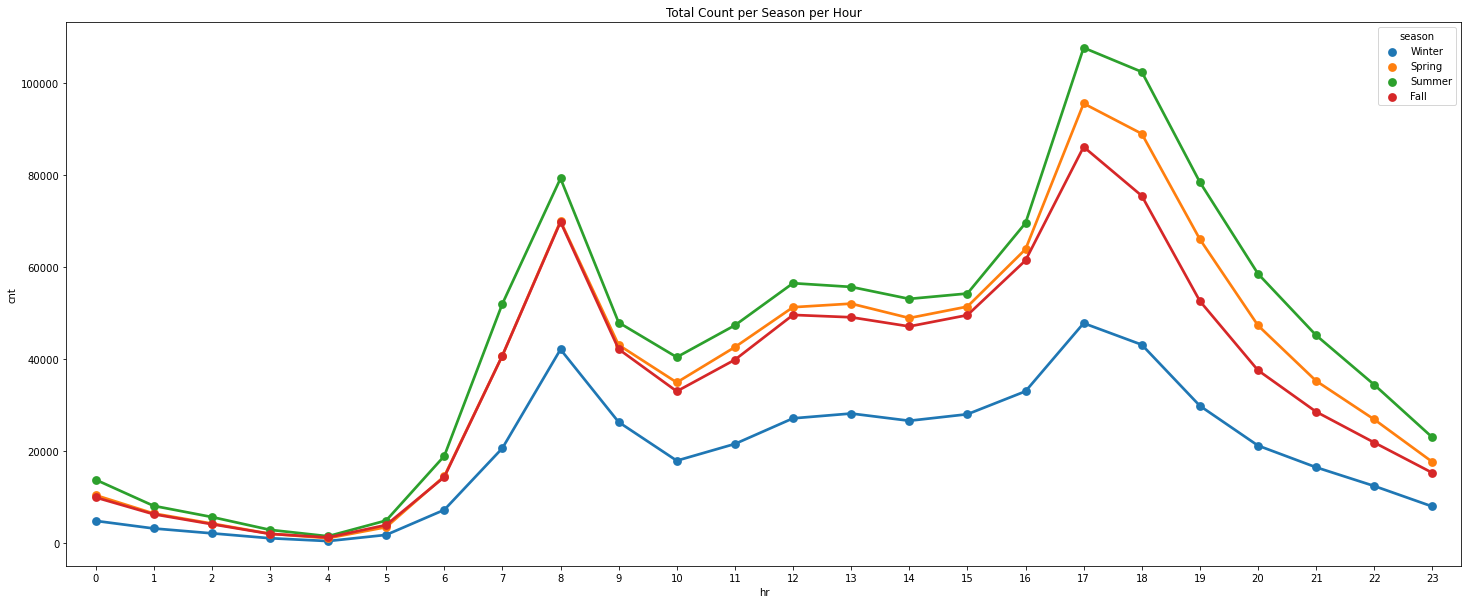

In [71]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='season', ci=0, estimator=sum)
plt.title('Total Count per Season per Hour')
plt.show()

In [72]:
pd.crosstab(index=df['season'], columns=df['hr'], values=df['cnt'], aggfunc='mean', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
season,,,,,,,,,,,,,,,,,,,,,,,,,
Fall,56.333333,35.920455,23.765714,11.861272,7.267045,22.590909,81.681818,231.607955,396.346591,239.443182,187.465909,226.369318,281.664773,277.209040,266.011299,279.819209,346.903955,486.158192,426.146893,297.033898,212.141243,161.327684,123.564972,86.440678,198.868856
Spring,56.842391,35.222826,23.380435,11.450549,6.211111,19.169399,79.070652,221.483696,380.135870,233.983696,189.777174,231.440217,278.543478,282.728261,265.777174,279.250000,346.907609,518.847826,483.173913,358.663043,256.983696,191.554348,146.114130,95.983696,208.344069
Summer,73.914439,43.720430,30.731183,15.752688,8.240642,26.454545,101.315508,276.595745,421.297872,254.930851,214.920213,251.696809,300.308511,296.042553,282.234043,288.409574,369.765957,572.138298,547.219251,419.160428,312.860963,241.427807,184.042781,122.919786,236.016237
Winter,27.404494,18.140449,12.794118,7.102564,3.181818,10.701754,40.792135,115.391061,235.167598,147.016760,100.217877,120.530726,150.727778,156.527778,147.805556,155.655556,182.314917,263.977901,239.500000,165.761111,117.838889,91.650000,69.111111,44.411111,111.114569
All,53.898072,33.375691,22.869930,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501,208.143054,253.315934,253.661180,240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.030220,172.314560,131.335165,87.831044,189.463088


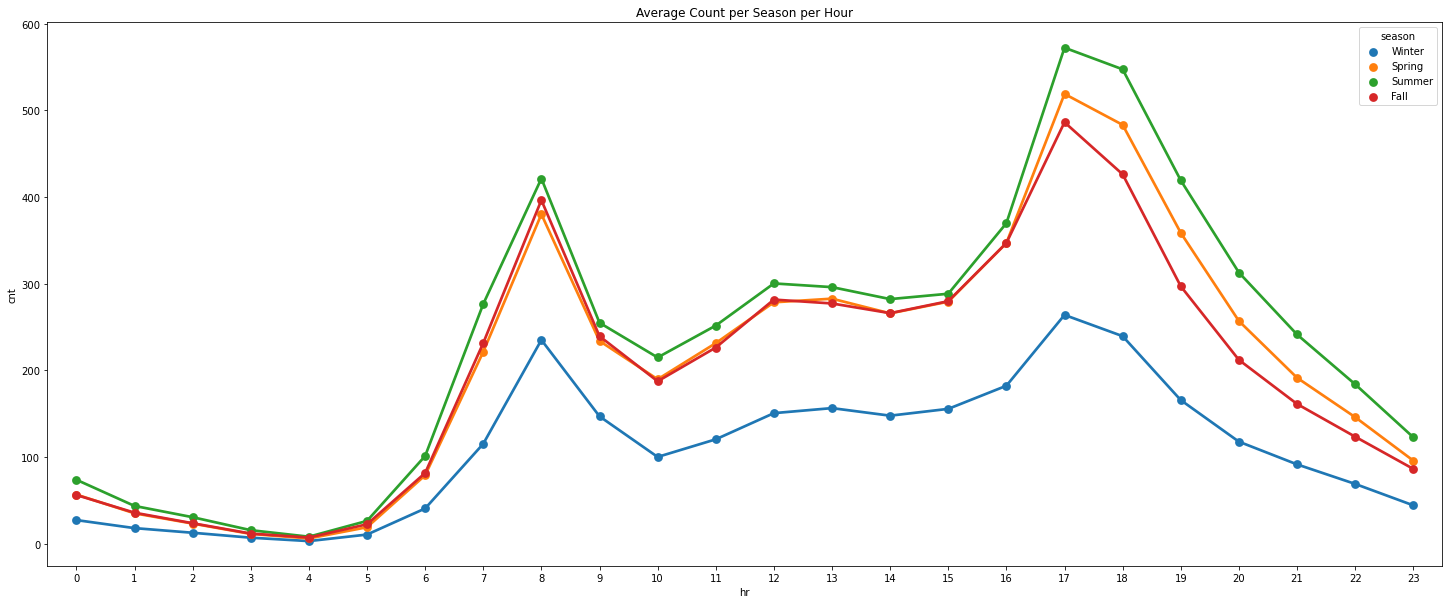

In [73]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='season', ci=0)
plt.title('Average Count per Season per Hour')
plt.show()

### Insight
- The total and average of bike demand at winter is the lowest at every hr. The highest bike demand happen at summer.
- There's no significant difference of number of bike demand during spring and fall.

In [74]:
pd.crosstab(index=df['yr'], columns=df['hr'], values=df['cnt'], aggfunc='sum', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
yr,,,,,,,,,,,,,,,,,,,,,,,,,
2011,15540,9558,6661,3441,1817,5157,20801,56930,95467,59486,47511,56598,69198,69339,66482,68590,85622,127632,116985,85802,62818,48875,37677,25116,1243103
2012,23590,14606,9691,4733,2611,9104,34331,97241,165534,99952,78746,94722,115216,115580,109170,114559,142126,209228,192787,140987,101732,76570,57935,38825,2049576
All,39130,24164,16352,8174,4428,14261,55132,154171,261001,159438,126257,151320,184414,184919,175652,183149,227748,336860,309772,226789,164550,125445,95612,63941,3292679


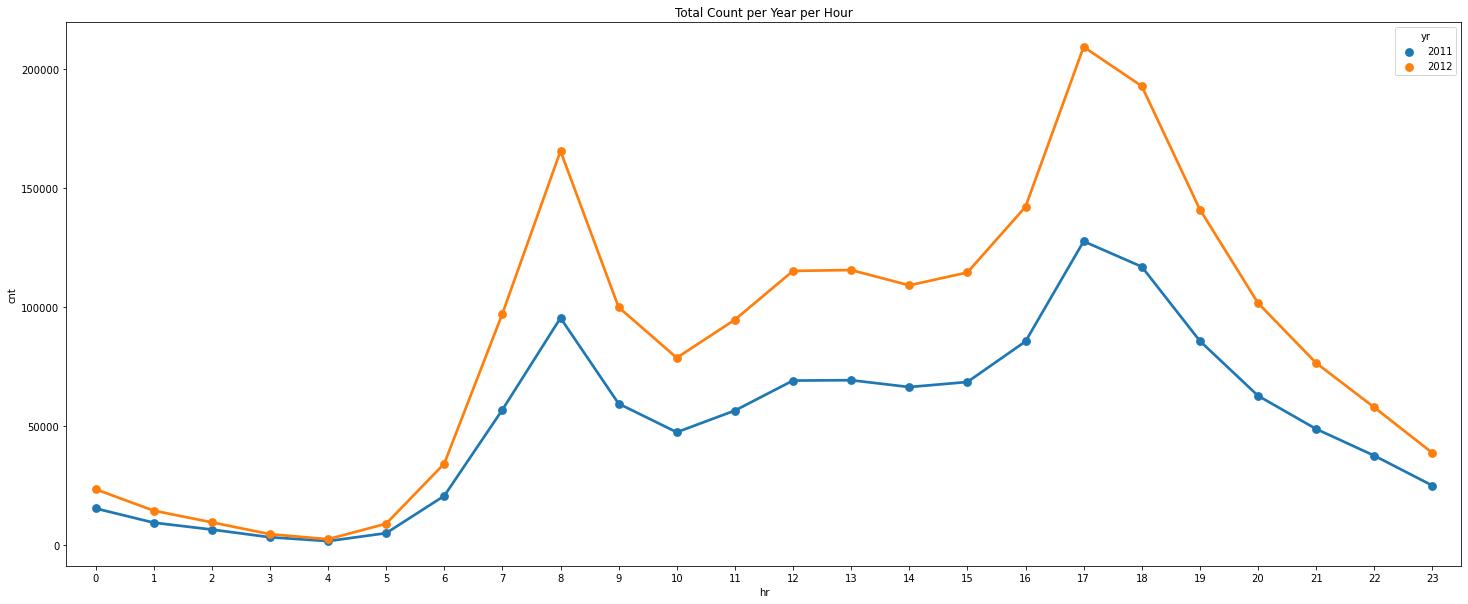

In [75]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='yr', ci=0, estimator=sum)
plt.title('Total Count per Year per Hour')
plt.show()

In [76]:
pd.crosstab(index=df['yr'], columns=df['hr'], values=df['cnt'], aggfunc='mean', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
yr,,,,,,,,,,,,,,,,,,,,,,,,,
2011,43.047091,26.550000,18.923295,10.061404,5.391691,14.609065,57.620499,156.831956,262.994490,163.873278,130.884298,155.917355,190.104396,190.491758,182.642857,188.434066,234.580822,349.676712,322.272727,236.369146,173.052342,134.641873,103.793388,69.190083,143.794448
2012,64.630137,40.126374,26.696970,13.332394,7.252778,25.010989,94.315934,267.145604,454.763736,274.593407,216.335165,260.225275,316.527473,316.657534,299.095890,313.860274,389.386301,573.227397,528.183562,386.265753,278.717808,209.780822,158.726027,106.369863,234.666361
All,53.898072,33.375691,22.869930,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501,208.143054,253.315934,253.661180,240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.030220,172.314560,131.335165,87.831044,189.463088


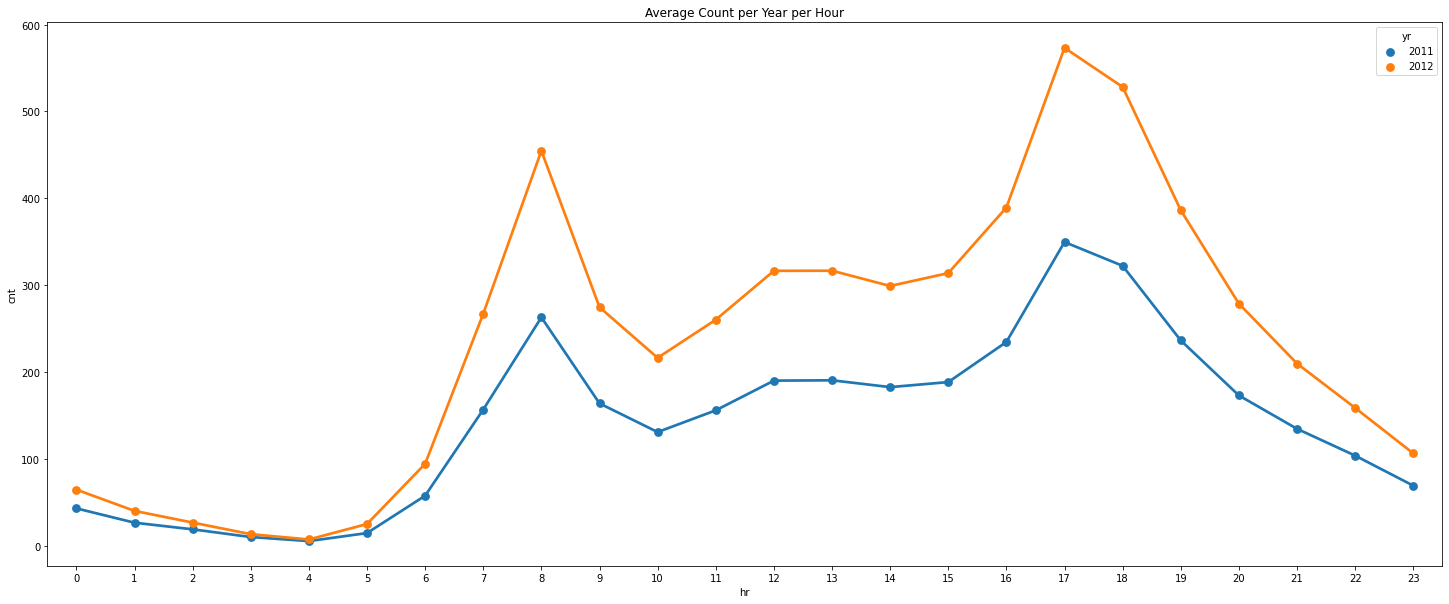

In [77]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='yr', ci=0)
plt.title('Average Count per Year per Hour')
plt.show()

In [78]:
pd.crosstab(index=df['mnth'], columns=df['hr'], values=df['cnt'], aggfunc='sum', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
mnth,,,,,,,,,,,,,,,,,,,,,,,,,
April,2659,1612,1208,588,289,927,3942,11544,20995,13075,10480,12645,15211,15482,15304,15784,19175,28691,26305,19077,12716,9555,7127,4703,269094
August,4178,2424,1653,833,493,1596,6290,17600,27082,16253,13091,15089,18596,17994,17187,17721,23067,36675,35103,26200,19036,14541,11069,7423,351194
December,2470,1683,1187,537,320,1038,3551,10097,18970,11832,8334,10332,12887,12919,12329,12945,15238,19624,17673,12437,8805,6935,5169,3724,211036
February,1635,945,658,308,111,565,2390,7289,14498,8638,5543,6574,8450,8683,7913,8464,10238,15532,13829,9499,6926,5627,4316,2721,151352
January,1462,1029,763,383,162,589,2148,5808,12442,7531,5072,5889,7451,7856,7318,7831,9379,13676,12283,8978,6354,4689,3510,2330,134933
July,5177,2997,2130,1042,500,1592,6111,16365,25368,15589,13197,15398,17805,17591,16952,17006,21921,33571,32344,25649,20281,15990,12217,8155,344948
June,4222,2595,1658,806,530,1512,6234,17131,26090,15766,12856,15308,18398,18186,17276,17481,22933,35347,32864,25418,19910,15081,11285,7455,346342
March,2160,1525,871,487,228,844,3459,9886,19462,12057,8443,10255,12939,13274,12582,13202,15664,24322,23026,15787,10722,8069,5981,3675,228920
May,4134,2530,1673,807,424,1241,5194,14260,24187,14858,12774,15787,18826,19321,17381,18763,23339,34058,31899,23685,17226,12807,9962,6550,331686


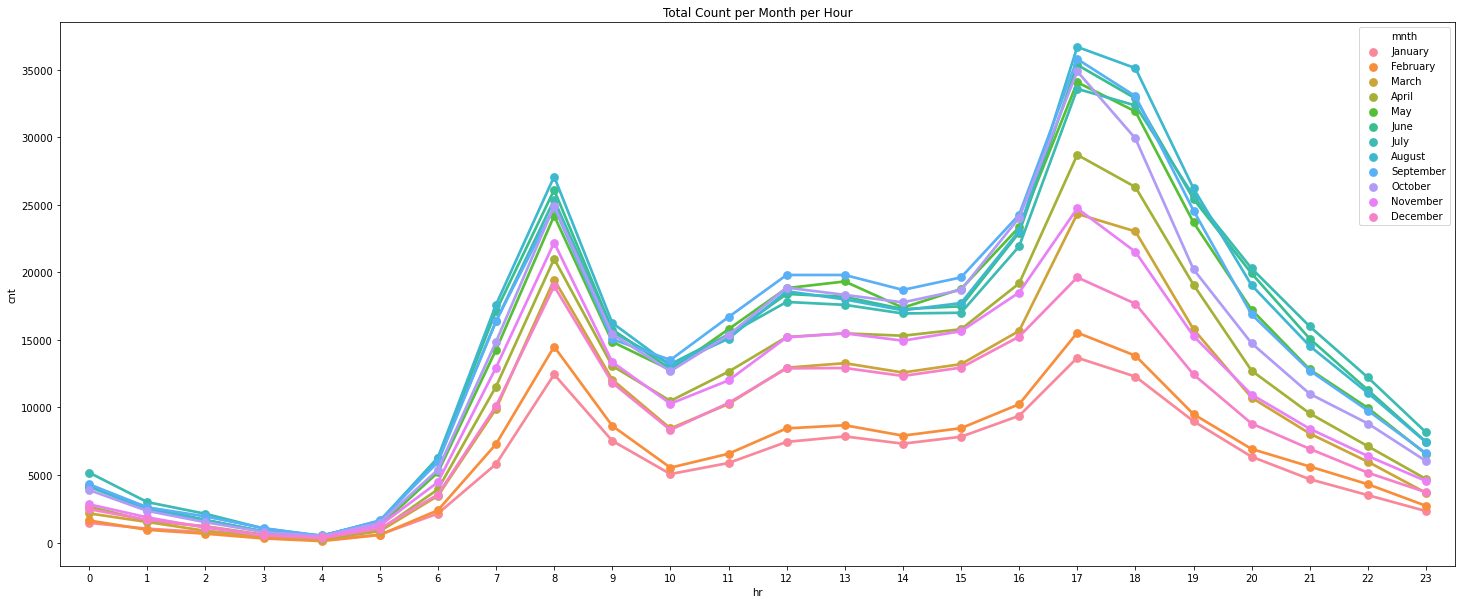

In [79]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='mnth', ci=0, estimator=sum)
plt.title('Total Count per Month per Hour')
plt.show()

In [80]:
pd.crosstab(index=df['mnth'], columns=df['hr'], values=df['cnt'], aggfunc='mean', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
mnth,,,,,,,,,,,,,,,,,,,,,,,,,
April,44.316667,26.866667,20.133333,10.137931,4.898305,15.450000,65.700000,192.400000,349.916667,217.916667,174.666667,210.750000,253.516667,258.033333,255.066667,263.066667,319.583333,478.183333,438.416667,317.950000,211.933333,159.250000,118.783333,78.383333,187.260960
August,68.491803,39.737705,27.098361,13.655738,8.081967,26.163934,103.114754,283.870968,436.806452,262.145161,211.145161,243.370968,299.935484,290.225806,277.209677,285.822581,372.048387,591.532258,575.459016,429.508197,312.065574,238.377049,181.459016,121.688525,238.097627
December,39.838710,27.145161,19.145161,8.950000,5.423729,16.741935,57.274194,162.854839,305.967742,190.838710,134.419355,166.645161,207.854839,208.370968,198.854839,208.790323,245.774194,316.516129,285.048387,200.596774,142.016129,111.854839,83.370968,60.064516,142.303439
February,29.196429,16.875000,12.185185,6.039216,2.466667,10.660377,41.929825,127.877193,254.350877,151.543860,97.245614,115.333333,148.245614,152.333333,138.824561,148.491228,179.614035,272.491228,242.614035,166.649123,121.508772,98.719298,75.719298,47.736842,112.865026
January,24.366667,17.150000,13.155172,8.148936,3.000000,10.333333,36.406780,96.800000,207.366667,125.516667,84.533333,98.150000,122.147541,128.786885,119.967213,128.377049,151.274194,220.580645,201.360656,147.180328,104.163934,76.868852,57.540984,38.196721,94.424773
July,83.500000,48.338710,34.354839,16.806452,8.064516,25.677419,98.564516,263.951613,409.161290,251.435484,212.854839,248.354839,287.177419,283.725806,273.419355,274.290323,353.564516,541.467742,521.677419,413.693548,327.112903,257.903226,197.048387,131.532258,231.819892
June,70.366667,43.250000,27.633333,13.433333,8.833333,25.200000,103.900000,285.516667,434.833333,262.766667,214.266667,255.133333,306.633333,303.100000,287.933333,291.350000,382.216667,589.116667,547.733333,423.633333,331.833333,251.350000,188.083333,124.250000,240.515278
March,34.838710,24.596774,15.017241,8.116667,4.145455,14.066667,55.790323,159.451613,313.903226,194.467742,136.177419,165.403226,208.693548,214.096774,202.935484,212.935484,252.645161,392.290323,371.387097,254.629032,172.935484,130.145161,96.467742,59.274194,155.410726
May,66.677419,40.806452,26.983871,13.016129,6.838710,20.016129,83.774194,230.000000,390.112903,239.645161,206.032258,254.629032,303.645161,311.629032,280.338710,302.629032,376.435484,549.322581,514.500000,382.016129,277.838710,206.564516,160.677419,105.645161,222.907258


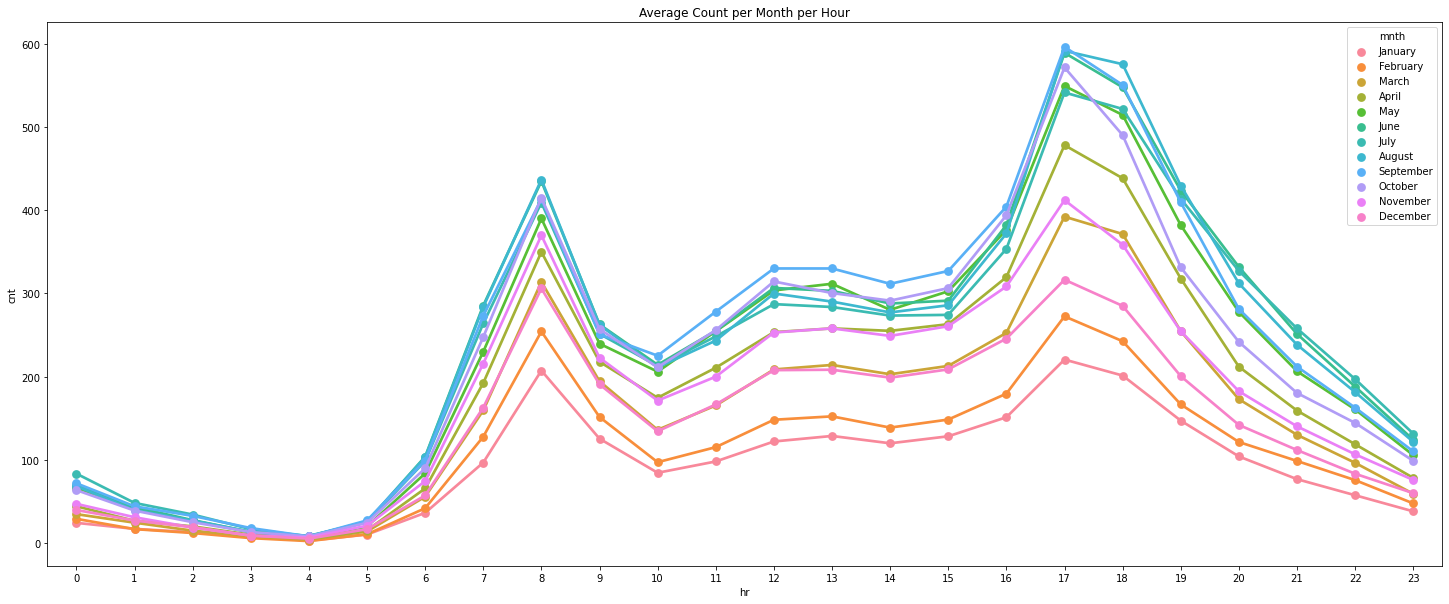

In [81]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='mnth', ci=0)
plt.title('Average Count per Month per Hour')
plt.show()

In [82]:
pd.crosstab(index=df['holiday'], columns=df['hr'], values=df['cnt'], aggfunc='sum', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
holiday,,,,,,,,,,,,,,,,,,,,,,,,,
Holiday,1207,817,535,209,117,223,594,1725,3581,3595,4273,5219,6030,6269,6012,5568,5718,6156,5644,4657,3737,3047,2286,1216,78435
Non-Holiday,37923,23347,15817,7965,4311,14038,54538,152446,257420,155843,121984,146101,178384,178650,169640,177581,222030,330704,304128,222132,160813,122398,93326,62725,3214244
All,39130,24164,16352,8174,4428,14261,55132,154171,261001,159438,126257,151320,184414,184919,175652,183149,227748,336860,309772,226789,164550,125445,95612,63941,3292679


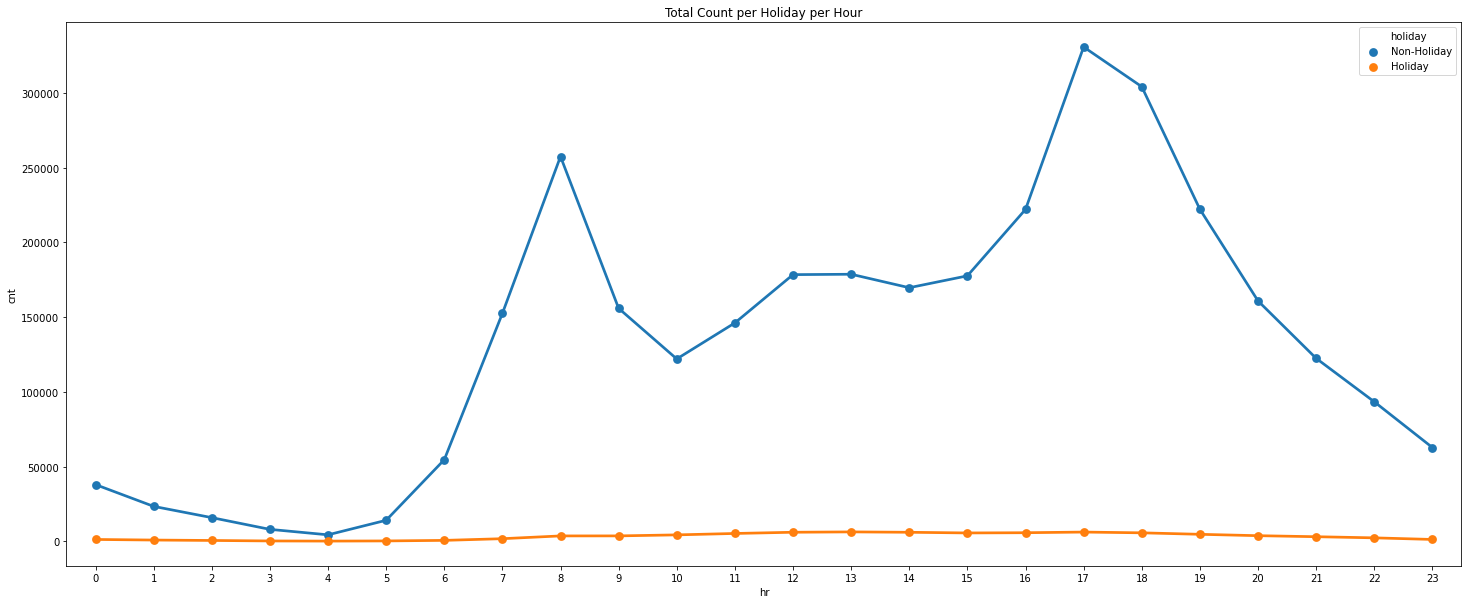

In [83]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='holiday', ci=0, estimator=sum)
plt.title('Total Count per Holiday per Hour')
plt.show()

In [84]:
pd.crosstab(index=df['holiday'], columns=df['hr'], values=df['cnt'], aggfunc='mean', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
holiday,,,,,,,,,,,,,,,,,,,,,,,,,
Holiday,57.476190,38.904762,25.476190,11.611111,5.850000,10.619048,28.285714,82.142857,170.523810,171.190476,203.476190,248.523810,287.142857,298.523810,286.285714,265.142857,272.285714,293.142857,268.761905,221.761905,177.952381,145.095238,108.857143,57.904762,156.870000
Non-Holiday,53.791489,33.210526,22.791066,11.730486,6.367799,20.169540,77.468750,215.929178,364.617564,220.740793,172.781870,206.941926,252.311174,252.330508,239.604520,250.820621,313.159379,466.437236,430.166902,314.189533,227.458274,173.123055,132.002829,88.719943,190.428580
All,53.898072,33.375691,22.869930,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501,208.143054,253.315934,253.661180,240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.030220,172.314560,131.335165,87.831044,189.463088


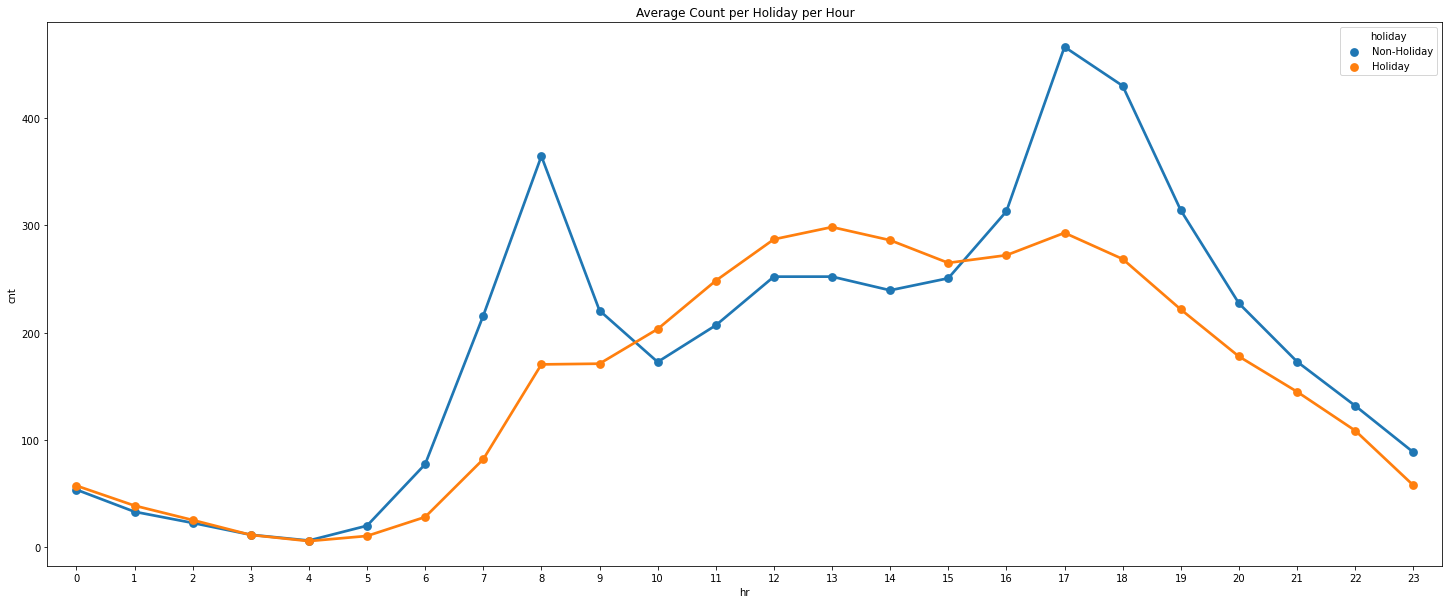

In [85]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='holiday', ci=0)
plt.title('Average Count per Holiday per Hour')
plt.show()

### Insight
- The total bike demand per hr during holiday is very small and constant compared during non-holiday.
- The patterns of bike demands per hr are quite different for holiday and non-holiday.

In [86]:
pd.crosstab(index=df['weekday'], columns=df['hr'], values=df['cnt'], aggfunc='sum', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
weekday,,,,,,,,,,,,,,,,,,,,,,,,,
Friday,5453,2571,1325,673,589,2486,9363,26450,48077,26935,16404,19564,24715,25113,23854,26256,34423,51211,43783,31415,22186,17667,15295,11982,487790
Monday,3571,1800,1021,496,567,2252,8930,25848,42868,22718,14459,17024,21581,21384,20041,21046,29583,52249,50060,35836,25176,18152,12039,6802,455503
Saturday,9902,7117,5302,2403,804,854,2205,4826,12020,19613,27691,34504,39415,40464,40040,40155,38445,35113,30373,24953,18810,16224,14525,12049,477807
Sunday,9775,8053,6286,3239,955,852,1493,3476,8805,16437,27151,33115,39161,39368,38181,37163,37317,33471,28626,23675,17643,13403,9883,6499,444027
Thursday,4045,1774,934,497,528,2669,11066,31388,50323,24810,13654,16360,20550,20233,18289,20237,29775,54844,52218,37279,27967,20580,15313,10062,485395
Tuesday,2790,1254,687,382,508,2470,10863,30569,48122,24118,13181,14924,18826,19031,17510,19438,29817,56605,53827,36808,26332,19368,13757,7922,469109
Wednesday,3594,1595,797,484,477,2678,11212,31614,50786,24807,13717,15829,20166,19326,17737,18854,28388,53367,50885,36823,26436,20051,14800,8625,473048
All,39130,24164,16352,8174,4428,14261,55132,154171,261001,159438,126257,151320,184414,184919,175652,183149,227748,336860,309772,226789,164550,125445,95612,63941,3292679


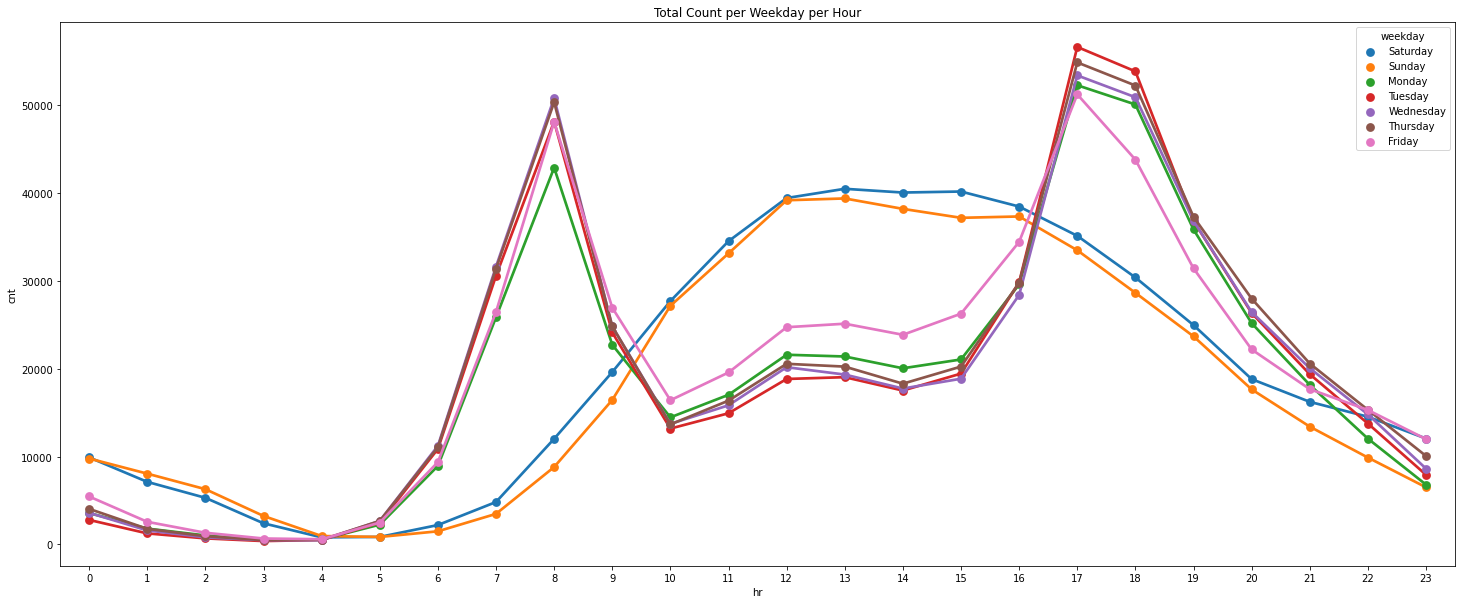

In [87]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='weekday', ci=0, estimator=sum)
plt.title('Total Count per Weekday per Hour')
plt.show()

In [88]:
pd.crosstab(index=df['weekday'], columns=df['hr'], values=df['cnt'], aggfunc='mean', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
weekday,,,,,,,,,,,,,,,,,,,,,,,,,
Friday,52.432692,24.721154,12.740385,6.598039,6.072165,23.903846,90.028846,254.326923,462.278846,258.990385,157.730769,188.115385,237.644231,241.471154,229.365385,252.461538,330.990385,492.413462,420.990385,302.067308,213.326923,169.875000,147.067308,115.211538,196.135907
Monday,34.009524,17.307692,10.313131,5.113402,5.785714,21.653846,85.865385,248.538462,412.192308,218.442308,139.028846,163.692308,207.509615,205.615385,192.701923,202.365385,284.451923,502.394231,481.346154,344.576923,242.076923,174.538462,115.759615,65.403846,183.744655
Saturday,94.304762,67.780952,50.495238,22.885714,7.657143,8.291262,21.000000,45.961905,114.476190,186.790476,263.723810,328.609524,375.380952,385.371429,381.333333,382.428571,366.142857,334.409524,292.048077,239.932692,180.865385,156.000000,139.663462,115.855769,190.209793
Sunday,93.990385,77.432692,61.627451,31.144231,9.362745,8.693878,14.495146,33.104762,83.857143,156.542857,258.580952,315.380952,372.961905,374.933333,363.628571,353.933333,355.400000,318.771429,272.628571,225.476190,168.028571,127.647619,94.123810,61.895238,177.468825
Thursday,39.271845,17.223301,9.156863,5.071429,5.280000,25.912621,107.436893,304.737864,488.572816,240.873786,132.563107,158.834951,199.514563,196.436893,177.563107,196.475728,286.298077,527.346154,502.096154,358.451923,268.913462,197.884615,147.240385,96.750000,196.436665
Tuesday,27.623762,12.540000,6.801980,4.152174,5.131313,24.455446,106.500000,299.696078,471.784314,236.450980,129.225490,146.313725,182.776699,182.990385,168.365385,186.903846,286.701923,544.278846,517.567308,353.923077,253.192308,186.230769,132.278846,76.173077,191.238891
Wednesday,34.557692,15.336538,7.813725,4.888889,4.968750,25.750000,107.807692,303.980769,488.326923,238.528846,131.894231,152.201923,193.903846,185.826923,170.548077,181.288462,272.961538,513.144231,494.029126,357.504854,256.660194,194.669903,143.689320,83.737864,191.130505
All,53.898072,33.375691,22.869930,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501,208.143054,253.315934,253.661180,240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.030220,172.314560,131.335165,87.831044,189.463088


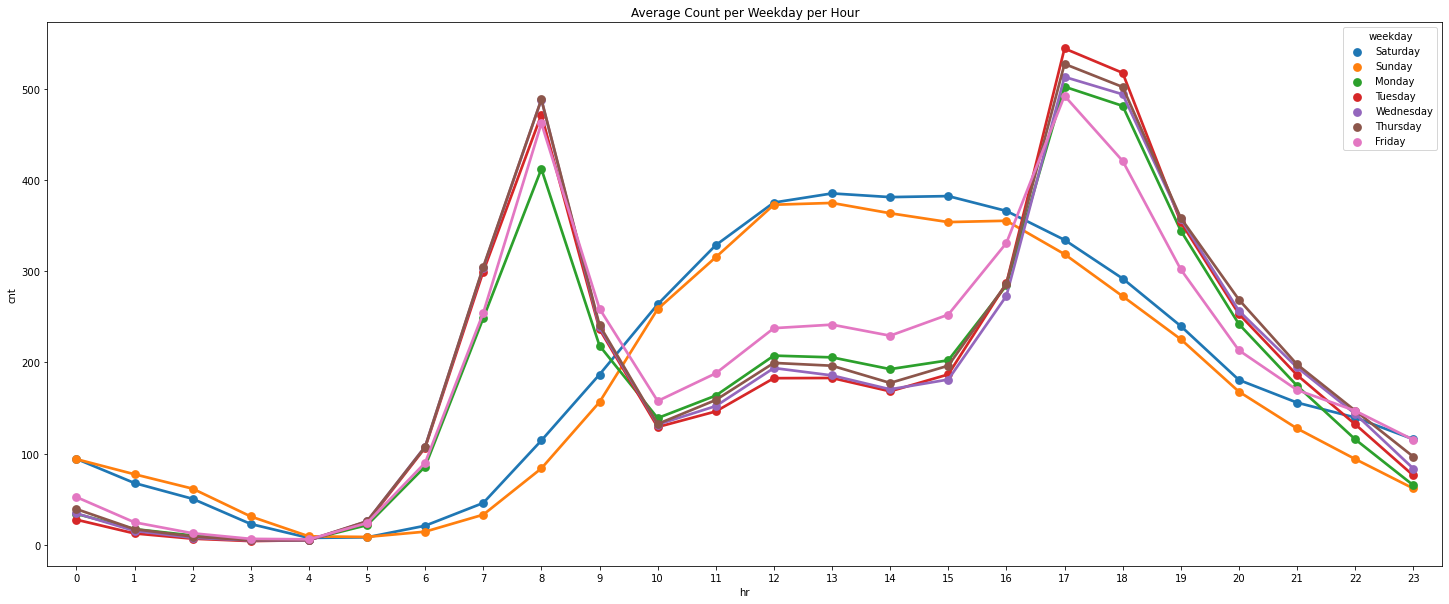

In [89]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='weekday', ci=0)
plt.title('Average Count per Weekday per Hour')
plt.show()

#### Insight
- Here we see that there are two patterns of bike demand per hr. The first pattern is for Monday - Friday, and the second is for Saturday and Sunday. Both patterns have different peaks hours.

In [90]:
pd.crosstab(index=df['workingday'], columns=df['hr'], values=df['cnt'], aggfunc='sum', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
workingday,,,,,,,,,,,,,,,,,,,,,,,,,
Non-Work,20884,15987,12123,5851,1876,1929,4292,10027,24406,39645,59115,72838,84606,86101,84233,82886,81480,74740,64643,53285,40190,32674,26694,19764,1000269
Work,18246,8177,4229,2323,2552,12332,50840,144144,236595,119793,67142,78482,99808,98818,91419,100263,146268,262120,245129,173504,124360,92771,68918,44177,2292410
All,39130,24164,16352,8174,4428,14261,55132,154171,261001,159438,126257,151320,184414,184919,175652,183149,227748,336860,309772,226789,164550,125445,95612,63941,3292679


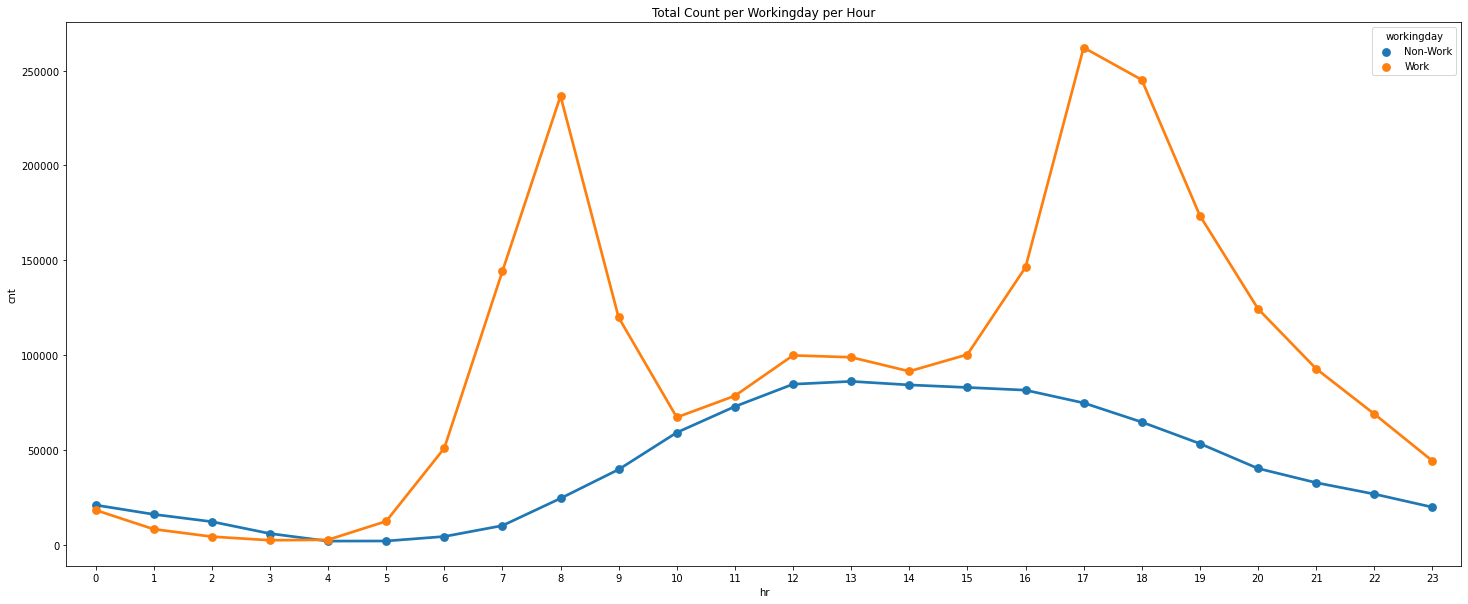

In [91]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='workingday', ci=0, estimator=sum)
plt.title('Total Count per Workingday per Hour')
plt.show()

In [92]:
pd.crosstab(index=df['workingday'], columns=df['hr'], values=df['cnt'], aggfunc='mean', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
workingday,,,,,,,,,,,,,,,,,,,,,,,,,
Non-Work,90.800000,69.508696,53.171053,25.775330,8.264317,8.689189,18.742358,43.406926,105.653680,171.623377,255.909091,315.316017,366.259740,372.731602,364.645022,358.813853,352.727273,323.549784,281.056522,231.673913,174.739130,142.060870,116.060870,85.930435,181.405332
Work,36.786290,16.552632,8.683778,4.942553,5.429787,24.913131,102.500000,290.612903,477.006048,241.518145,135.366935,158.229839,200.820926,198.429719,183.572289,201.331325,293.122244,525.290581,492.226908,348.401606,249.718876,186.287149,138.389558,88.708835,193.207754
All,53.898072,33.375691,22.869930,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501,208.143054,253.315934,253.661180,240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.030220,172.314560,131.335165,87.831044,189.463088


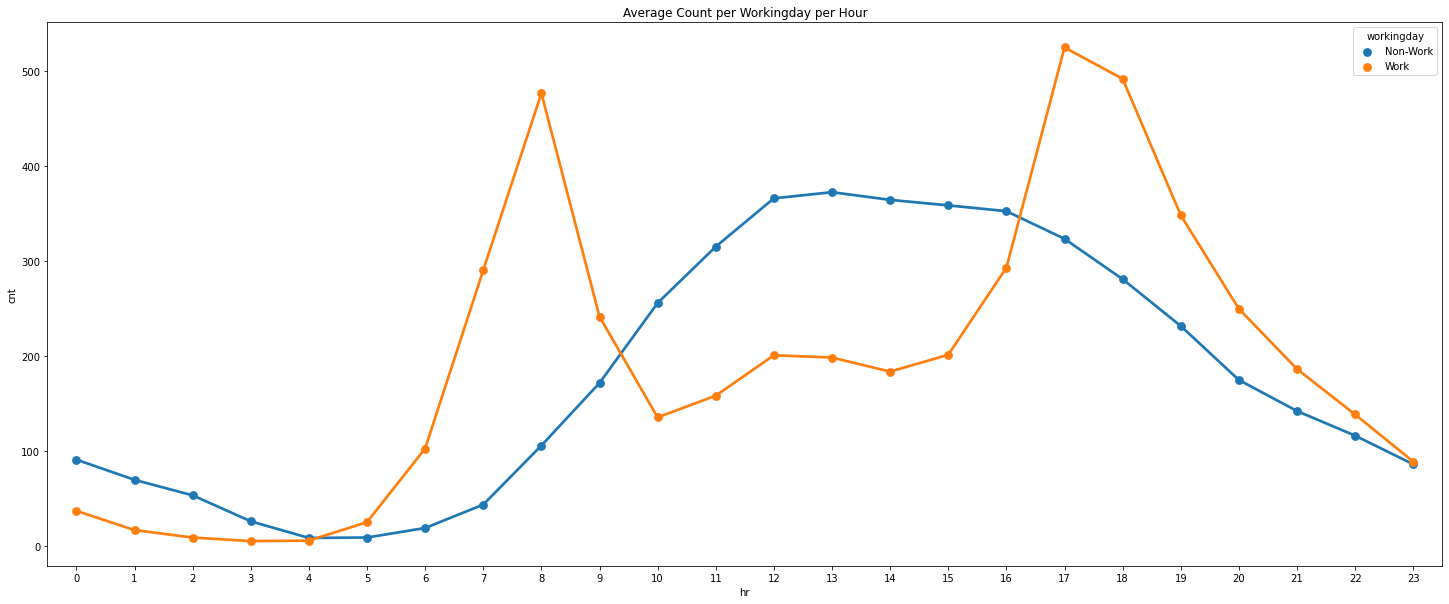

In [93]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='workingday', ci=0)
plt.title('Average Count per Workingday per Hour')
plt.show()

In [94]:
pd.crosstab(index=df['weathersit'], columns=df['hr'], values=df['cnt'], aggfunc='sum', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
weathersit,,,,,,,,,,,,,,,,,,,,,,,,,
Clear,28930.0,16854.0,10907.0,5458.0,2931.0,9452.0,35862.0,96903.0,158998.0,97122.0,85457.0,104725.0,124915.0,131209.0,127726.0,133486.0,171230.0,253718.0,229220.0,171073.0,127332.0,95842.0,72584.0,46239.0,2338173
Cloudy,8738.0,6362.0,4614.0,2341.0,1230.0,4129.0,16191.0,48093.0,89604.0,55351.0,36678.0,42564.0,51950.0,46978.0,40479.0,40551.0,44946.0,62167.0,61686.0,45124.0,28636.0,23987.0,19159.0,14394.0,795952
Heavy Rain/Snow,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,164.0,NaN,NaN,NaN,NaN,NaN,223
Light Rain/Snow,1462.0,925.0,831.0,375.0,267.0,680.0,3079.0,9175.0,12399.0,6965.0,4122.0,4031.0,7549.0,6732.0,7447.0,9112.0,11536.0,20975.0,18702.0,10592.0,8582.0,5616.0,3869.0,3308.0,158331
All,39130.0,24164.0,16352.0,8174.0,4428.0,14261.0,55132.0,154171.0,261001.0,159438.0,126257.0,151320.0,184414.0,184919.0,175652.0,183149.0,227748.0,336860.0,309772.0,226789.0,164550.0,125445.0,95612.0,63941.0,3292679


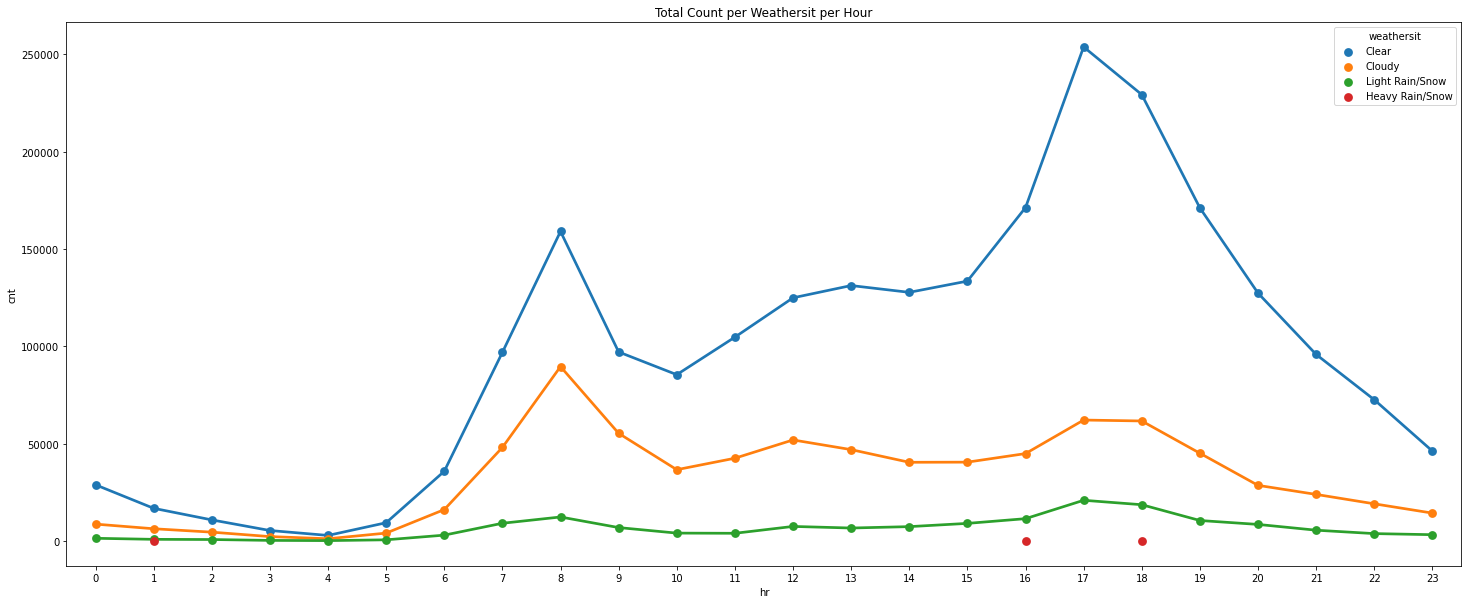

In [95]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='weathersit', ci=0, estimator=sum)
plt.title('Total Count per Weathersit per Hour')
plt.show()

#### Insight
- Clear weathersit clearly dominate other types of weathersit.
- For clear weathersit, the total bike demand is the highest for every hour. 
- For Light Snow/Rain weathersit, the total bike demand per hour is low and stable.

In [96]:
pd.crosstab(index=df['weathersit'], columns=df['hr'], values=df['cnt'], aggfunc='mean', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
weathersit,,,,,,,,,,,,,,,,,,,,,,,,,
Clear,59.161554,34.395918,22.817992,11.995604,6.413567,20.414687,79.165563,218.742664,361.359091,226.391608,192.470721,234.284116,281.975169,283.388769,269.464135,275.228866,335.745098,500.429980,458.440000,336.096267,244.869231,186.826511,142.601179,93.981707,204.869272
Cloudy,47.232432,35.541899,25.491713,12.452128,6.721311,20.141463,74.612903,224.733645,391.283843,226.848361,159.469565,182.678112,225.869565,225.855769,208.654639,227.814607,299.640000,422.904762,390.417722,282.025000,204.542857,151.816456,116.823171,85.171598,175.165493
Heavy Rain/Snow,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,164.000000,NaN,NaN,NaN,NaN,NaN,74.333333
Light Rain/Snow,28.115385,17.129630,14.839286,6.944444,4.684211,13.877551,55.981818,131.071429,213.775862,128.981481,77.773585,85.765957,137.254545,116.068966,122.081967,138.060606,167.188406,275.986842,271.043478,179.525424,126.205882,98.526316,70.345455,49.373134,111.579281
All,53.898072,33.375691,22.869930,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501,208.143054,253.315934,253.661180,240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.030220,172.314560,131.335165,87.831044,189.463088


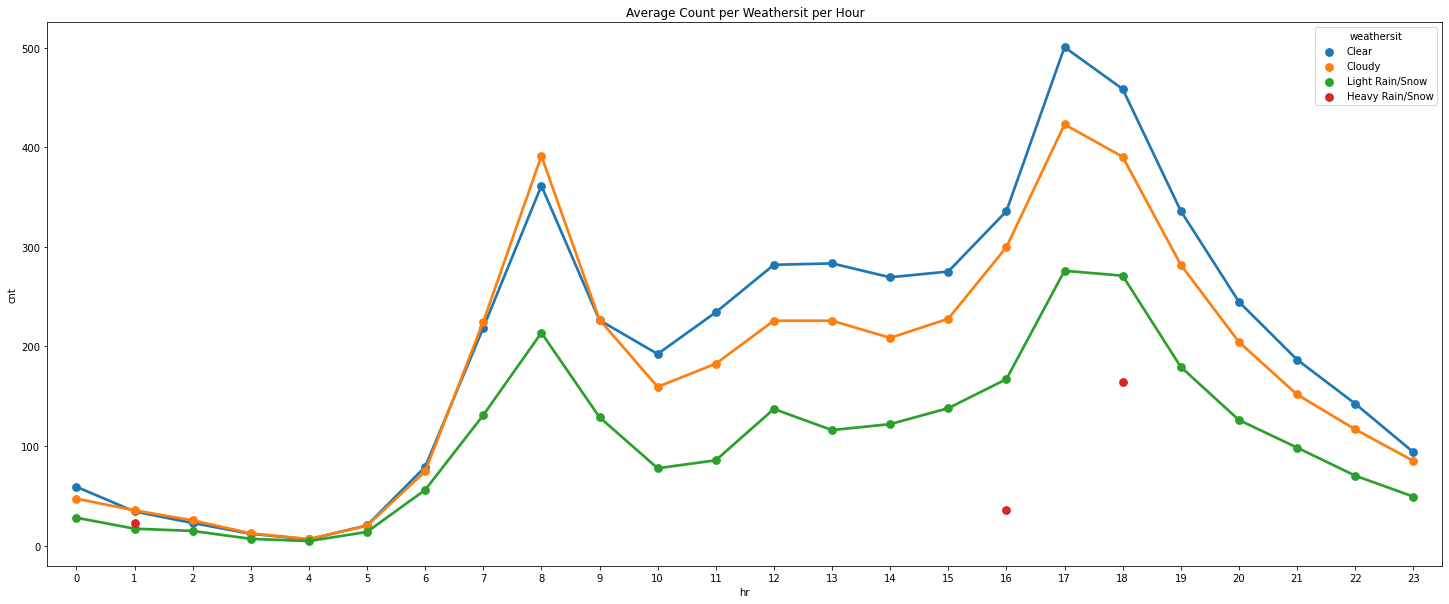

In [97]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='weathersit', ci=0)
plt.title('Average Count per Weathersit per Hour')
plt.show()

#### Insight
- On averages, the number of bike demand for all weathersit except Heavy Rain/Snow, are quite the same.
- The highest averages per hour happens during Clear and Cloudy weathersit.  

In [98]:
pd.crosstab(index=df['temp_cat'], columns=df['hr'], values=df['cnt'], aggfunc='sum', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
temp_cat,,,,,,,,,,,,,,,,,,,,,,,,,
Cold,9257,6330,4480,2270,1261,4295,16485,46726,82744,45891,28964,29916,32217,27489,23633,23787,29179,45831,45481,36254,27531,23290,19245,13528,626084
Cool,12816,8315,5622,2751,1533,5067,19433,50335,82540,47366,38082,44201,52429,51582,47668,51217,60519,89954,83093,63391,45619,35781,28979,20743,949036
Warm,16749,9325,6119,3153,1634,4899,19214,57110,94900,62181,52938,65473,82085,85233,80975,84160,110289,162510,152574,113197,84184,62281,45572,29474,1486229
Hot,308,194,131,0,0,0,0,0,817,4000,6273,11730,17683,20615,23376,23985,27761,38565,28624,13947,7216,4093,1816,196,231330
All,39130,24164,16352,8174,4428,14261,55132,154171,261001,159438,126257,151320,184414,184919,175652,183149,227748,336860,309772,226789,164550,125445,95612,63941,3292679


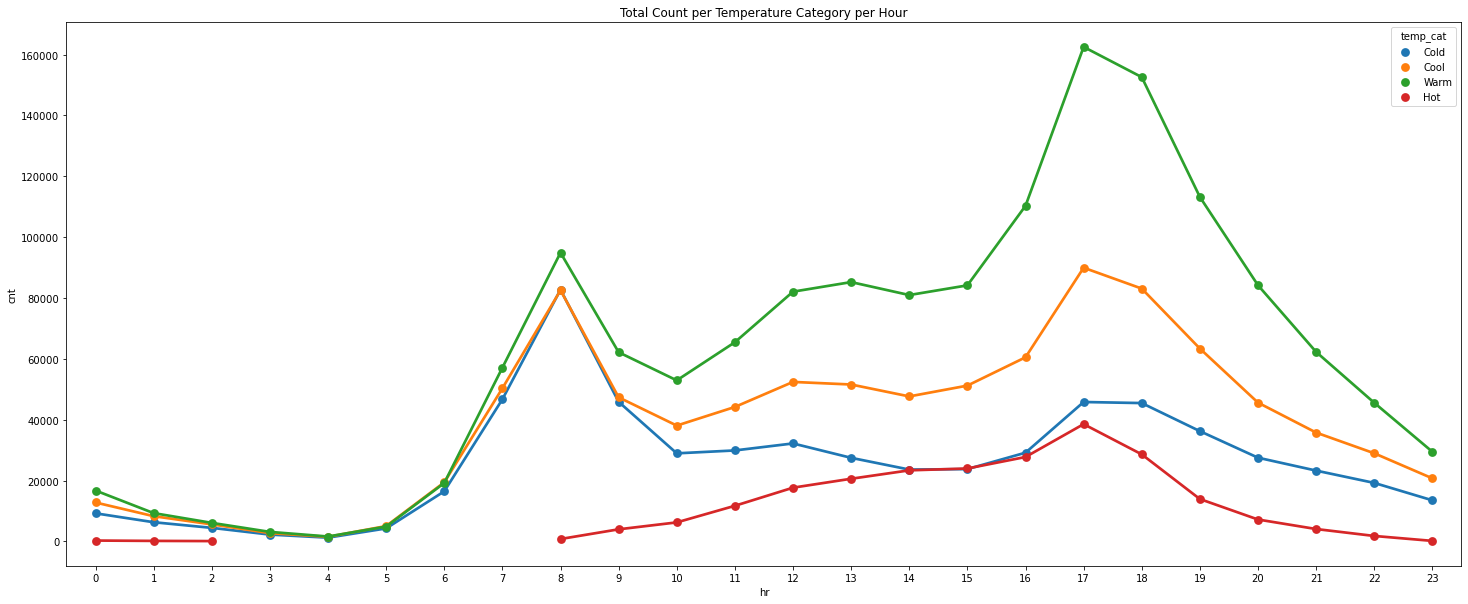

In [99]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='temp_cat', ci=0, estimator=sum)
plt.title('Total Count per Temperature Category per Hour')
plt.show()

In [100]:
pd.crosstab(index=df['temp_cat'], columns=df['hr'], values=df['cnt'], aggfunc='mean', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
temp_cat,,,,,,,,,,,,,,,,,,,,,,,,,
Cold,34.412639,23.018182,16.173285,8.470149,4.552347,14.081967,53.006431,150.244373,279.540541,169.339483,117.739837,134.756757,159.490099,150.213115,138.204678,143.295181,169.645349,247.735135,228.547739,167.842593,120.750000,95.061224,74.883268,51.831418,107.704111
Cool,57.470852,37.120536,24.766520,12.226667,6.905405,23.243119,88.735160,245.536585,406.600985,240.436548,183.971014,214.567961,253.280193,249.188406,235.980198,253.549505,301.089552,438.800000,407.318627,303.306220,221.451456,175.397059,137.995238,93.017937,187.704905
Warm,72.506494,41.816143,29.277512,15.455882,8.252525,25.252577,98.533333,270.663507,425.560538,256.946281,218.752066,264.004032,323.169291,321.633962,301.022305,306.036364,395.301075,601.888889,567.189591,420.806691,309.500000,235.912879,180.126482,121.793388,256.202207
Hot,102.666667,97.000000,65.500000,NaN,NaN,NaN,NaN,NaN,163.400000,235.294118,196.031250,230.000000,272.046154,278.581081,268.689655,278.895349,355.910256,550.928571,511.142857,410.205882,328.000000,272.866667,227.000000,98.000000,326.276446
All,53.898072,33.375691,22.869930,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501,208.143054,253.315934,253.661180,240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.030220,172.314560,131.335165,87.831044,189.463088


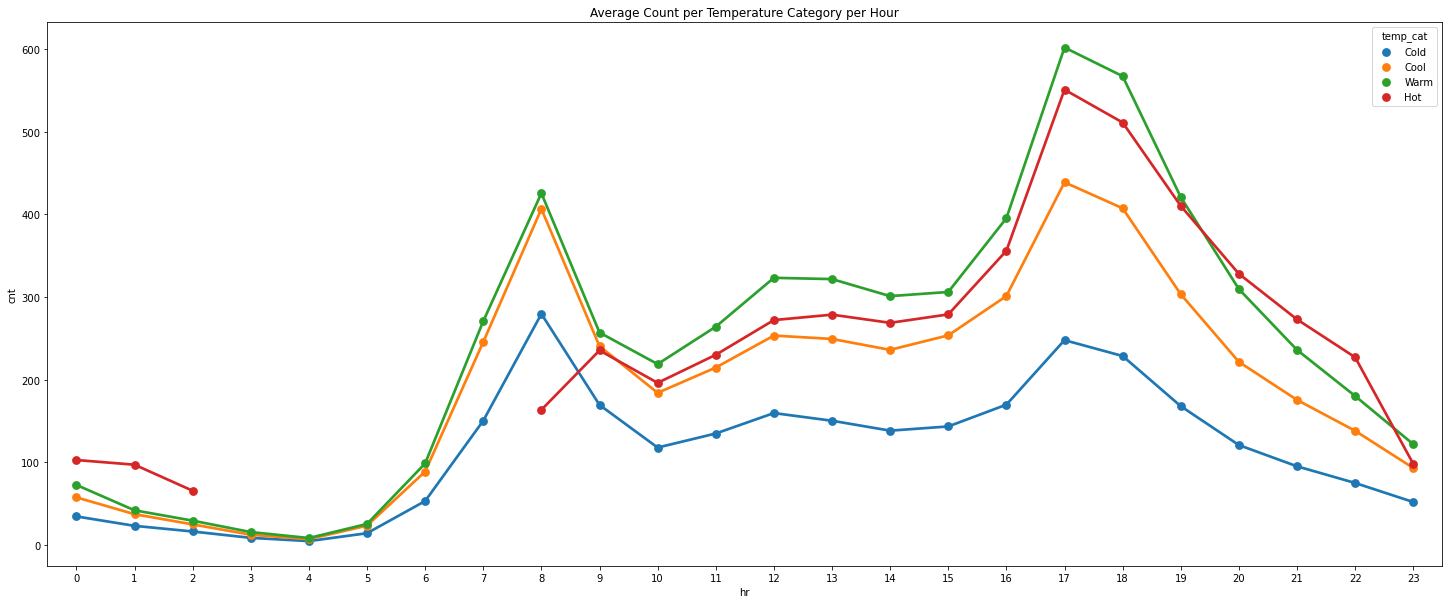

In [101]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='temp_cat', ci=0)
plt.title('Average Count per Temperature Category per Hour')
plt.show()

#### Insight
- The highest total bike demand happen at warm temperature.
- As expected, the number of bike demands varies proportionally with the temperature.

In [102]:
pd.crosstab(index=df['atemp_cat'], columns=df['hr'], values=df['cnt'], aggfunc='sum', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
atemp_cat,,,,,,,,,,,,,,,,,,,,,,,,,
Cold,9345,6384,4499,2276,1270,4331,16642,47105,83412,46269,29195,30219,32582,27846,23961,24170,29667,46622,46150,36745,27890,23545,19458,13649,633232
Cool,13763,8962,6141,2991,1704,5399,21405,53817,85387,48905,38767,44304,52562,51781,48366,51752,61042,90632,84472,65128,47326,37215,30852,22163,974836
Warm,14477,8109,5294,2682,1371,4408,16458,51879,81564,53779,44579,56334,69377,70407,70717,72466,93978,136506,125878,94931,71347,53742,38678,24918,1263879
Hot,1545,709,418,225,83,123,627,1370,10638,10277,12879,19331,27881,33479,30467,33217,41145,60791,51180,28724,17442,10718,6475,3211,402955
Extreme,0,0,0,0,0,0,0,0,0,208,837,1132,2012,1406,2141,1544,1916,2309,2092,1261,545,225,149,0,17777
All,39130,24164,16352,8174,4428,14261,55132,154171,261001,159438,126257,151320,184414,184919,175652,183149,227748,336860,309772,226789,164550,125445,95612,63941,3292679


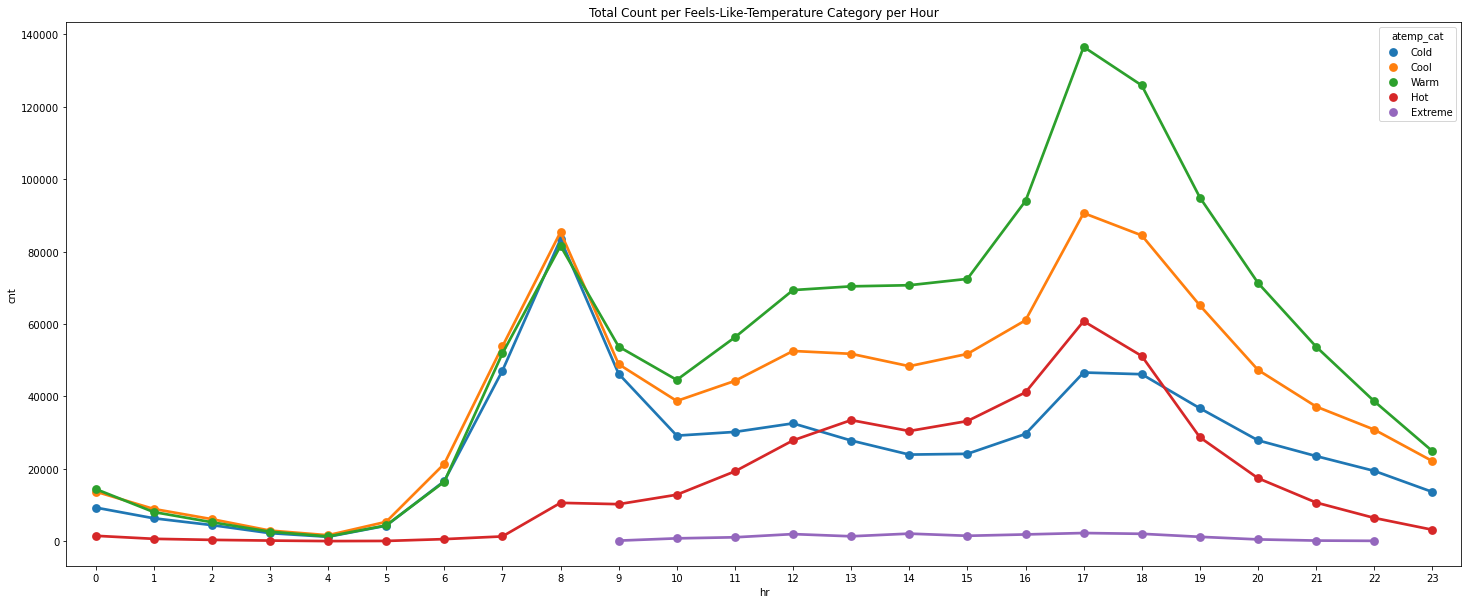

In [103]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='atemp_cat', ci=0, estimator=sum)
plt.title('Total Count per Feels-Like-Temperature Category per Hour')
plt.show()

In [104]:
pd.crosstab(index=df['atemp_cat'], columns=df['hr'], values=df['cnt'], aggfunc='mean', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
atemp_cat,,,,,,,,,,,,,,,,,,,,,,,,,
Cold,34.611111,23.130435,16.183453,8.460967,4.568345,14.153595,53.339744,150.977564,280.848485,170.106618,118.198381,135.511211,160.502463,151.336957,139.308140,144.730539,171.485549,250.655914,230.750000,169.331797,121.790393,95.711382,75.418605,52.095420,108.485866
Cool,57.345833,37.033058,25.168033,12.258197,6.983607,22.974468,89.936975,243.515837,400.877934,236.256039,182.004695,211.980861,251.492823,246.576190,233.652174,251.223301,299.225490,435.730769,406.115385,301.518519,220.120930,174.718310,136.513274,92.732218,183.550367
Warm,73.487310,42.678947,29.411111,15.593023,8.259036,26.238095,99.144578,281.951087,431.555556,262.336585,222.895000,269.540670,327.250000,327.474419,306.134199,309.683761,398.211864,609.401786,564.475336,421.915556,312.925439,237.796460,182.443396,123.356436,258.250715
Hot,81.315789,44.312500,32.153846,18.750000,9.222222,15.375000,69.666667,137.000000,379.928571,244.690476,204.428571,238.654321,293.484211,293.675439,282.101852,291.377193,374.045455,568.140187,556.304348,428.716418,323.000000,255.190476,208.870968,128.440000,317.537431
Extreme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.000000,209.250000,226.400000,223.555556,234.333333,194.636364,193.000000,273.714286,461.800000,418.400000,420.333333,272.500000,225.000000,149.000000,NaN,261.426471
All,53.898072,33.375691,22.869930,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501,208.143054,253.315934,253.661180,240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.030220,172.314560,131.335165,87.831044,189.463088


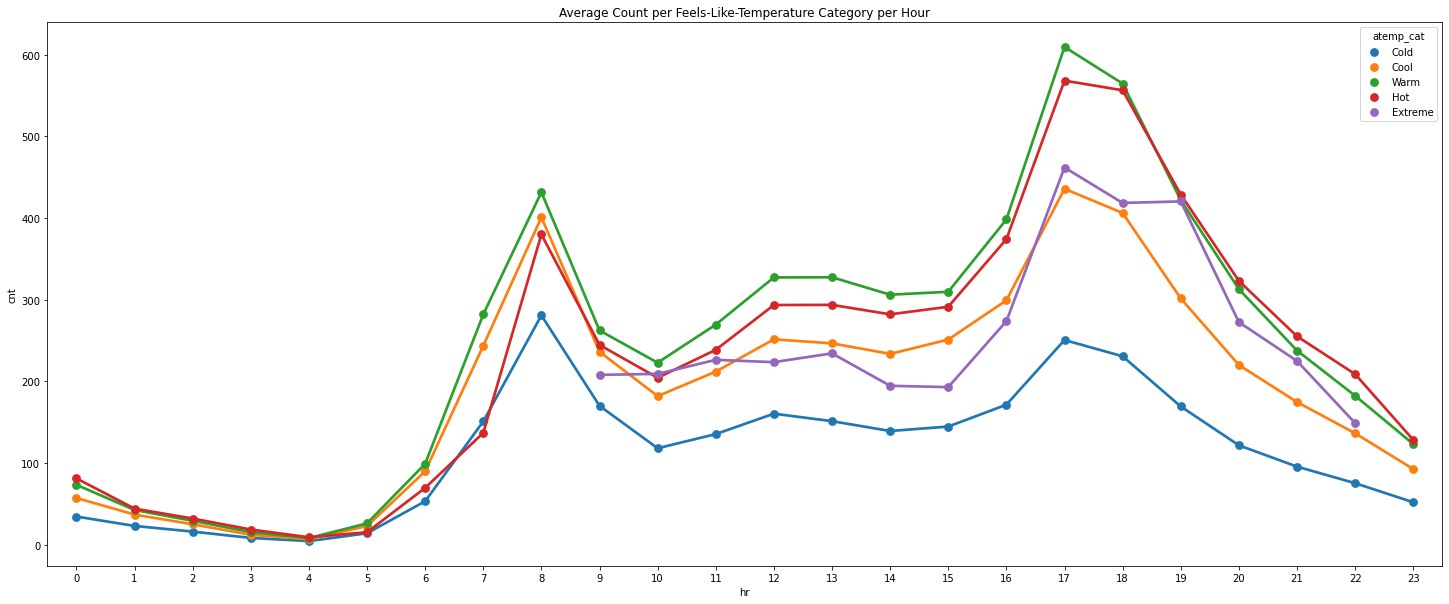

In [105]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='atemp_cat', ci=0)
plt.title('Average Count per Feels-Like-Temperature Category per Hour')
plt.show()

In [106]:
pd.crosstab(index=df['hum_cat'], columns=df['hr'], values=df['cnt'], aggfunc='sum', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
hum_cat,,,,,,,,,,,,,,,,,,,,,,,,,
Too Dry,377,258,153,67,13,38,137,446,790,1041,1952,4562,10338,15393,20891,25657,33428,42676,35121,17725,7027,3364,1276,661,223391
Optimum,11867,6464,3978,1548,681,2009,8771,29906,70907,62470,61369,90355,125732,132269,121048,120985,146379,213321,180985,122168,79888,52610,36821,22209,1704740
Too Moist,26886,17442,12221,6559,3734,12214,46224,123819,189304,95927,62936,56403,48344,37257,33713,36507,47941,80863,93666,86896,77635,69471,57515,41071,1364548
All,39130,24164,16352,8174,4428,14261,55132,154171,261001,159438,126257,151320,184414,184919,175652,183149,227748,336860,309772,226789,164550,125445,95612,63941,3292679


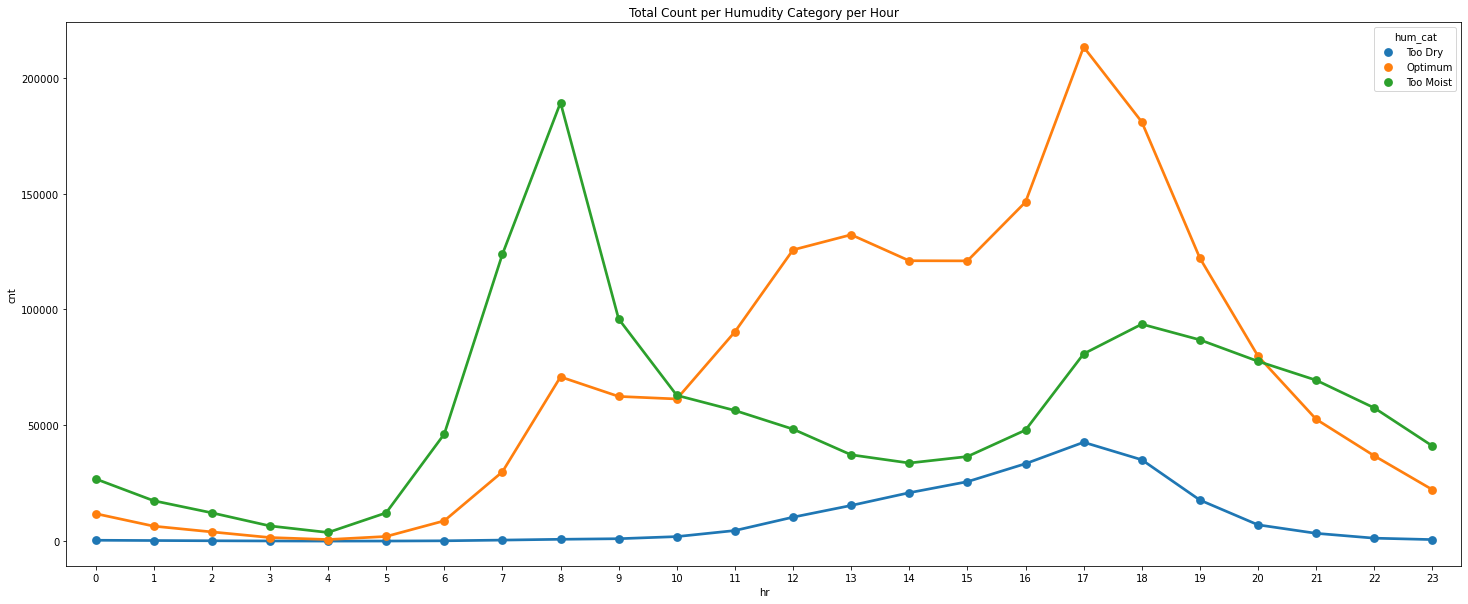

In [107]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='hum_cat', ci=0, estimator=sum)
plt.title('Total Count per Humudity Category per Hour')
plt.show()

#### Insight
- During 00.00-10.00, the total bike demand dominated by too moist category of humidity.
- Whereas during 10.00-20.00 dominated by the optimum category. 

In [108]:
pd.crosstab(index=df['hum_cat'], columns=df['hr'], values=df['cnt'], aggfunc='mean', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
hum_cat,,,,,,,,,,,,,,,,,,,,,,,,,
Too Dry,37.700000,32.250000,19.125000,9.571429,4.333333,12.666667,34.250000,89.200000,197.500000,148.714286,162.666667,190.083333,258.450000,252.344262,248.702381,256.570000,312.411215,474.177778,456.116883,340.865385,250.964286,177.052632,106.333333,73.444444,288.618863
Optimum,55.195349,32.812183,23.678571,10.901408,5.238462,15.219697,62.650000,188.088050,349.295567,222.313167,179.967742,219.841849,268.085288,272.158436,257.548936,270.055804,338.057737,498.413551,446.876543,326.652406,231.559420,174.784053,132.449640,88.836000,236.572301
Too Moist,53.664671,33.606936,22.673469,11.968978,6.620567,20.986254,79.559380,219.927176,364.046154,218.512528,168.278075,193.160959,220.748858,204.708791,192.645714,201.696133,252.321053,381.429245,380.756098,287.735099,218.690141,170.272059,131.312785,87.571429,145.180126
All,53.898072,33.375691,22.869930,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501,208.143054,253.315934,253.661180,240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.030220,172.314560,131.335165,87.831044,189.463088


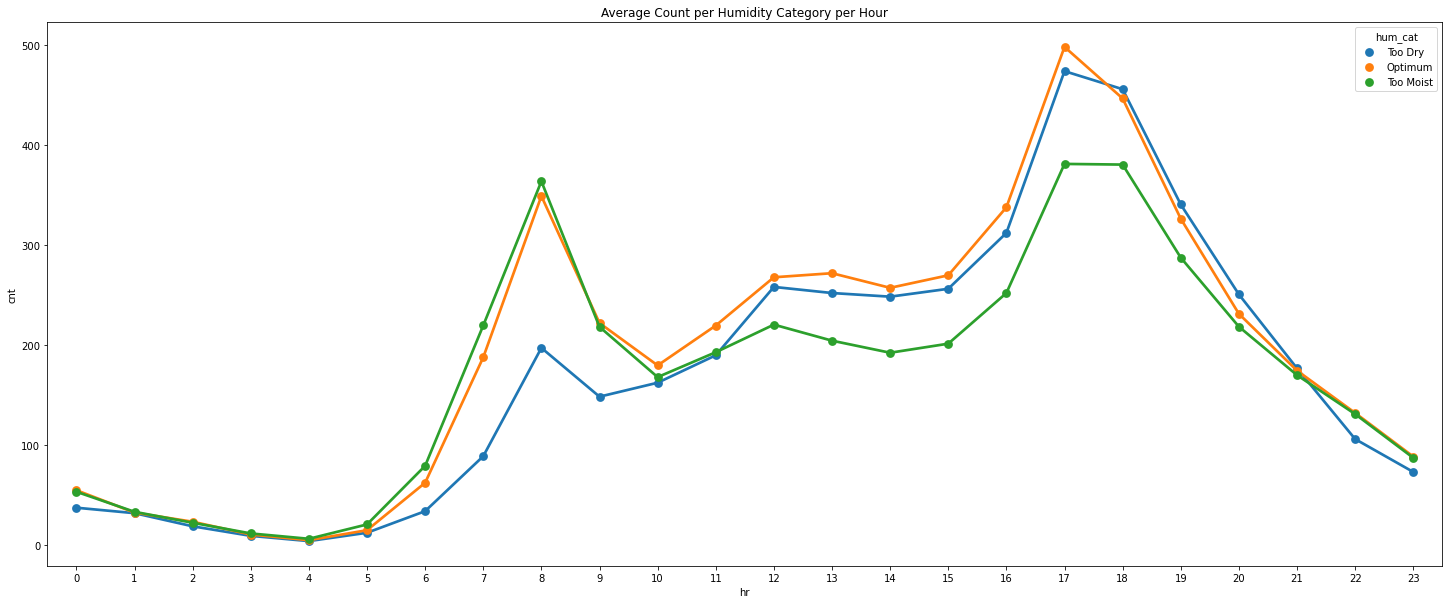

In [109]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='hum_cat', ci=0)
plt.title('Average Count per Humidity Category per Hour')
plt.show()

#### Insight
- During 00.00-11.00 the avarage of bike demand dominated by optimum and too moist category. 
- Whereas for 10.00-21.00, the averages dominated by optimum dan too dry category. 

In [110]:
pd.crosstab(index=df['wind_cat'], columns=df['hr'], values=df['cnt'], aggfunc='sum', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
wind_cat,,,,,,,,,,,,,,,,,,,,,,,,,
Slow Wind,36895,22683,15570,7800,4140,13460,52307,143387,235105,138000,109412,128860,149678,153196,139071,146027,178722,263353,256862,195421,148167,115113,88483,60158,2801870
Normal,2235,1471,747,360,287,801,2825,10784,25867,21383,16543,21985,33713,30598,36097,36398,48259,71417,51613,31011,16175,9854,6850,3697,480970
Strong Wind,0,10,35,14,1,0,0,0,29,55,302,475,1023,1125,484,724,767,2090,1297,357,208,478,279,86,9839
All,39130,24164,16352,8174,4428,14261,55132,154171,261001,159438,126257,151320,184414,184919,175652,183149,227748,336860,309772,226789,164550,125445,95612,63941,3292679


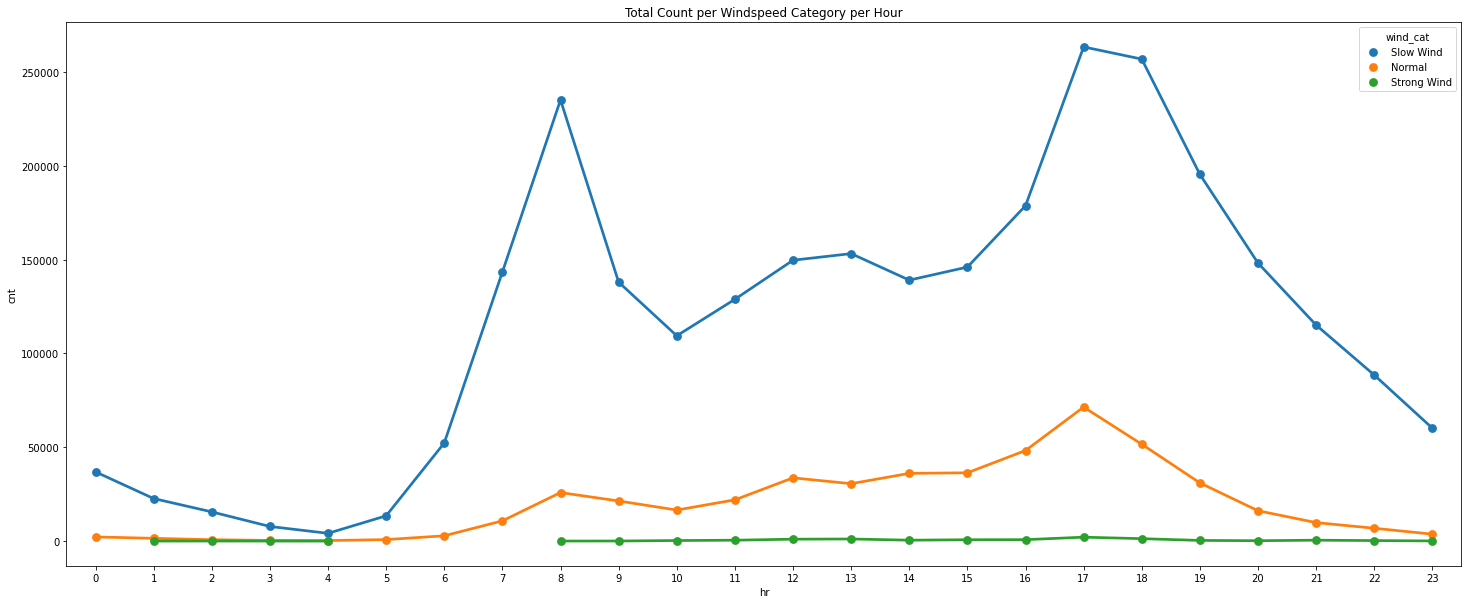

In [111]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='wind_cat', ci=0, estimator=sum)
plt.title('Total Count per Windspeed Category per Hour')
plt.show()

In [112]:
pd.crosstab(index=df['wind_cat'], columns=df['hr'], values=df['cnt'], aggfunc='mean', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
wind_cat,,,,,,,,,,,,,,,,,,,,,,,,,
Slow Wind,55.564759,34.420334,23.378378,11.944870,6.468750,20.089552,77.722140,214.651198,362.257319,222.940226,178.195440,215.125209,262.133100,262.771870,247.017762,257.998233,318.010676,467.767318,436.840136,322.476898,232.966981,177.918083,135.918587,90.327327,187.090678
Normal,36.048387,23.349206,15.893617,8.372093,5.125000,17.042553,54.326923,182.779661,335.935065,199.841121,149.036036,175.880000,221.796053,218.557143,221.453988,230.367089,292.478788,449.163522,385.171642,260.596639,183.806818,127.974026,91.333333,60.606557,205.542735
Strong Wind,NaN,5.000000,17.500000,14.000000,1.000000,NaN,NaN,NaN,29.000000,55.000000,151.000000,158.333333,204.600000,187.500000,161.333333,144.800000,255.666667,261.250000,216.166667,119.000000,52.000000,119.500000,139.500000,86.000000,156.174603
All,53.898072,33.375691,22.869930,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501,208.143054,253.315934,253.661180,240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.030220,172.314560,131.335165,87.831044,189.463088


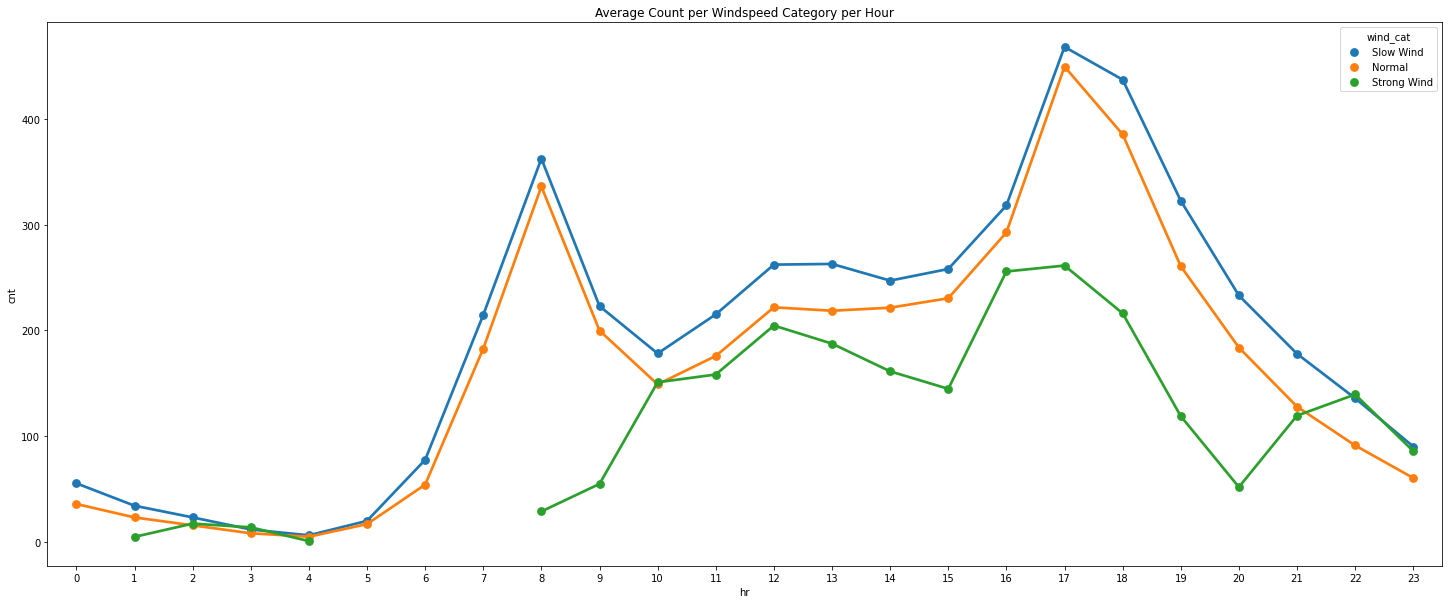

In [113]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='wind_cat', ci=0)
plt.title('Average Count per Windspeed Category per Hour')
plt.show()

#### Insight
- In total, the number of bike demand per hour dominated by the slow wind category.
- Whereas on averages, the number of bike demand per hour dominated by the slow wind and normal wind category.

In [114]:
pd.crosstab(index=df['event'], columns=df['hr'], values=df['cnt'], aggfunc='sum', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
event,,,,,,,,,,,,,,,,,,,,,,,,,
No,39130.0,24164.0,16352.0,8174.0,4428.0,14261.0,55132.0,154171.0,170715.0,159438.0,126257.0,150010.0,172651.0,169129.0,165396.0,174172.0,219529.0,214962.0,209297.0,217395.0,164550.0,125445.0,95612.0,63941.0,2914311
Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90286.0,NaN,NaN,1310.0,11763.0,15790.0,10256.0,8977.0,8219.0,121898.0,100475.0,9394.0,NaN,NaN,NaN,NaN,378368
All,39130.0,24164.0,16352.0,8174.0,4428.0,14261.0,55132.0,154171.0,261001.0,159438.0,126257.0,151320.0,184414.0,184919.0,175652.0,183149.0,227748.0,336860.0,309772.0,226789.0,164550.0,125445.0,95612.0,63941.0,3292679


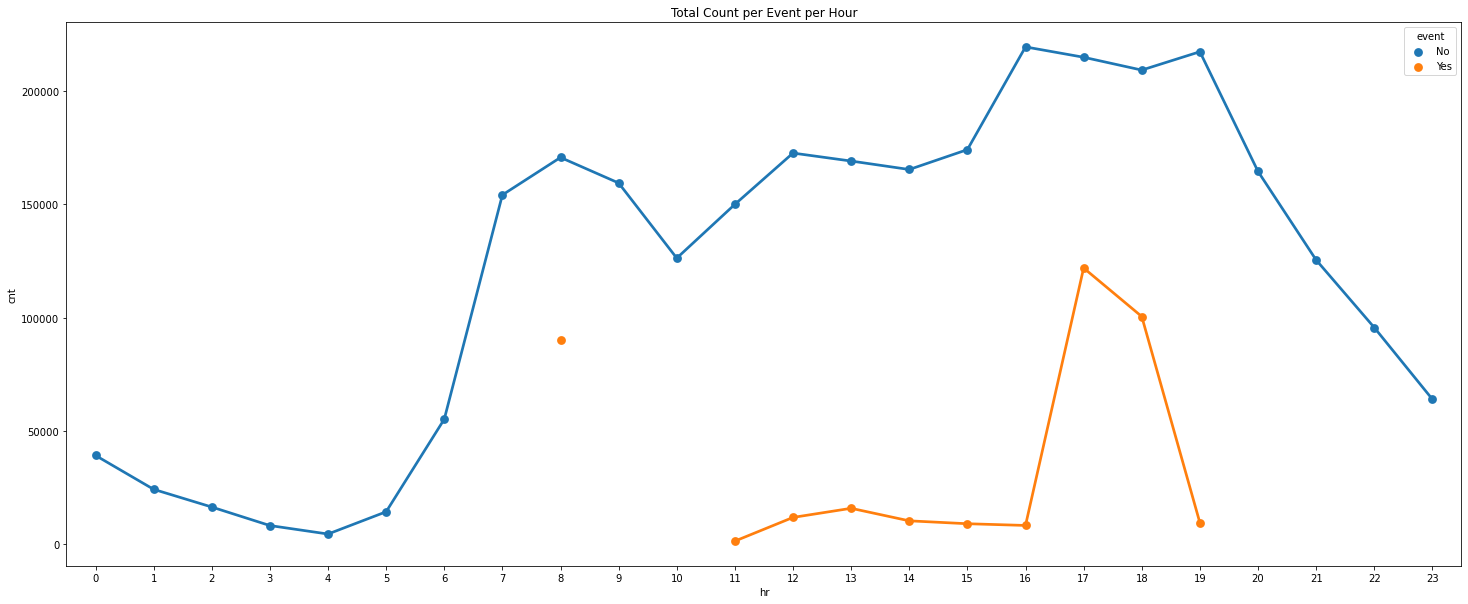

In [115]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='event', ci=0, estimator=sum)
plt.title('Total Count per Event per Hour')
plt.show()

In [116]:
pd.crosstab(index=df['event'], columns=df['hr'], values=df['cnt'], aggfunc='mean', margins=True)

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
event,,,,,,,,,,,,,,,,,,,,,,,,,
No,53.898072,33.375691,22.86993,11.727403,6.352941,19.889819,76.044138,212.064649,284.525000,219.309491,173.668501,206.910345,242.828411,239.559490,231.647059,243.256983,305.750696,372.551127,349.410684,304.474790,226.03022,172.31456,131.335165,87.831044,172.710146
Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710.913386,NaN,NaN,655.000000,691.941176,686.521739,683.733333,690.538462,684.916667,796.718954,778.875969,671.000000,NaN,NaN,NaN,NaN,749.243564
All,53.898072,33.375691,22.86993,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501,208.143054,253.315934,253.661180,240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.03022,172.31456,131.335165,87.831044,189.463088


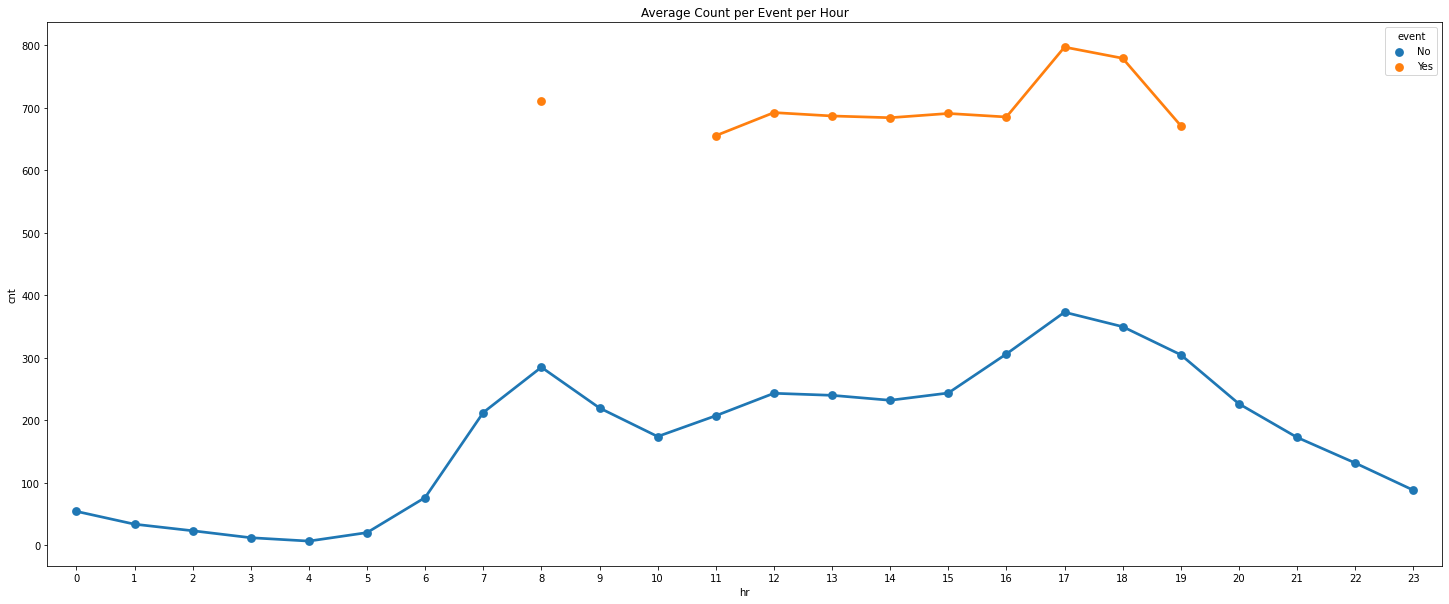

In [117]:
plt.figure(figsize=(25,10))
sns.pointplot(x='hr',y='cnt', data=df, hue='event', ci=0)
plt.title('Average Count per Event per Hour')
plt.show()

## Resume Insight
- The most popular season (season with the highest total and average bike demand) is summer.
- There are significant differences of number of bike demand (cnt) among seasons. The highest to the lowest number of bike demands are summer, spring, fall, winter.
- The total and the average number of bike sharing demand increase around 60% from 2011 to 2012.
- The highest total bike sharing demand is 351.194 on August.
- The highest average bike sharing demand is 240,77 on September.
- The number of bike sharing demand (cnt) varies with month.
- The highest total and average bike sharing demand happens at the time 08.00 and 17.00.
- The lowest total and average bike sharing demand happens at the time 04.00.
- The number of bike sharing demand (cnt) varies with hr.
- The total number of bike demands alot higher on the non-holiday. This due to the fact that the number of holiday date is alot less than non-holiday. But the averages are not too different.
- The number of bike sharing demand (cnt) varies with feature Holiday.
- The total and average of bike demand does not varies significantly with the feature Weekday.
- The total number of bike demands alot higher on the working day. But on average, there's no significant difference between working and non-working day. 
- The number of bike sharing demand (cnt) does not varies significantly with feature Workingday.
- As we expected, the most popular weather is clear.
- The better the weather, the hightest the bike demand. 
- The number of bike demand varies with the weathersit feature.
- The highest total bike demand happens at temperature 21-30 degree Celcius (Warm). Whereas the highest average bike demand happens at temperature >30 degree Celcius (Hot).
- So the bike demand varies with temperature.
- The highest total bike demand happens at atemp 21-30 degree Celcius (Warm). Whereas the highest average bike demand happens at atem >30 degree Celcius (Hot).
- So the bike demand varies with atemp feature.
- The highest total bike demand happens at optimum humidity (31-60 %). Whereas the highest average bike demand happens at Too dry category of humidity (0-30 %).
- So the bike demand varies with humidity category.
- The highest total bike demand happens at slow winspeed (0-20 km/h). Whereas the highest average bike demand happens at normal winspeed (21-40 km/h).
- So the bike demand varies with windspeed category.
- In total, the number of bike demand when there is an event is less than when there's no event. But on average, the number of bike demand is alot higher when there's an event.
- The number of bike demand varies with event feature.
- The total and average of bike demand at winter is the lowest at every hr. The highest bike demand happen at summer.
- There's no significant difference of number of bike demand during spring and fall.
- The total bike demand per hr during holiday is very small and constant compared during non-holiday.
- The patterns of bike demands per hr are quite different for holiday and non-holiday.
- Here we see that there are two patterns of bike demand per hr. The first pattern is for Monday - Friday, and the second is for Saturday and Sunday. Both patterns have different peaks hours.
- Clear weathersit clearly dominate other types of weathersit.
- For clear weathersit, the total bike demand is the highest for every hour. 
- For Light Snow/Rain weathersit, the total bike demand per hour is low and stable.
- During 00.00-10.00, the total bike demand dominated by too moist category of humidity.
- Whereas during 10.00-20.00 dominated by the optimum category. 
- During 00.00-11.00 the avarage of bike demand dominated by optimum and too moist category. 
- Whereas for 10.00-21.00, the averages dominated by optimum dan too dry category. 
- In total, the number of bike demand per hour dominated by the slow wind category.
- Whereas on averages, the number of bike demand per hour dominated by the slow wind and normal wind category.



## Conclusion
- Based on the data analysis above, the following are the possible options and recommendations for scheduling bike maintenance : 
    - Daily maintenance (light maintenance) can be done around 4 am, since we have the lowest average demand at that time. 
    - Weekly maintenance (routine maintenance) recommended to be done on Sunday, since Sunday have the lowest daily demand averages. 
    - Regular events, such as holidays, should be taken into consideration into bike maintenance/storing schedule to minimize customer loss.
    - On bad weather, e.g. winter, unused bikes should be stored in the warehouse to reduce destructive effect of weather to the bikes.
    - The demand per hour pattern is different for working and non-working day. In the next section below, we will see a bike storing simulation for workingday pattern.

## Bike Storing Scheduling Simulation

In [122]:
df[['hr','cnt']].groupby('hr').mean().T

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
cnt,53.898072,33.375691,22.86993,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501,208.143054,253.315934,253.66118,240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.03022,172.31456,131.335165,87.831044


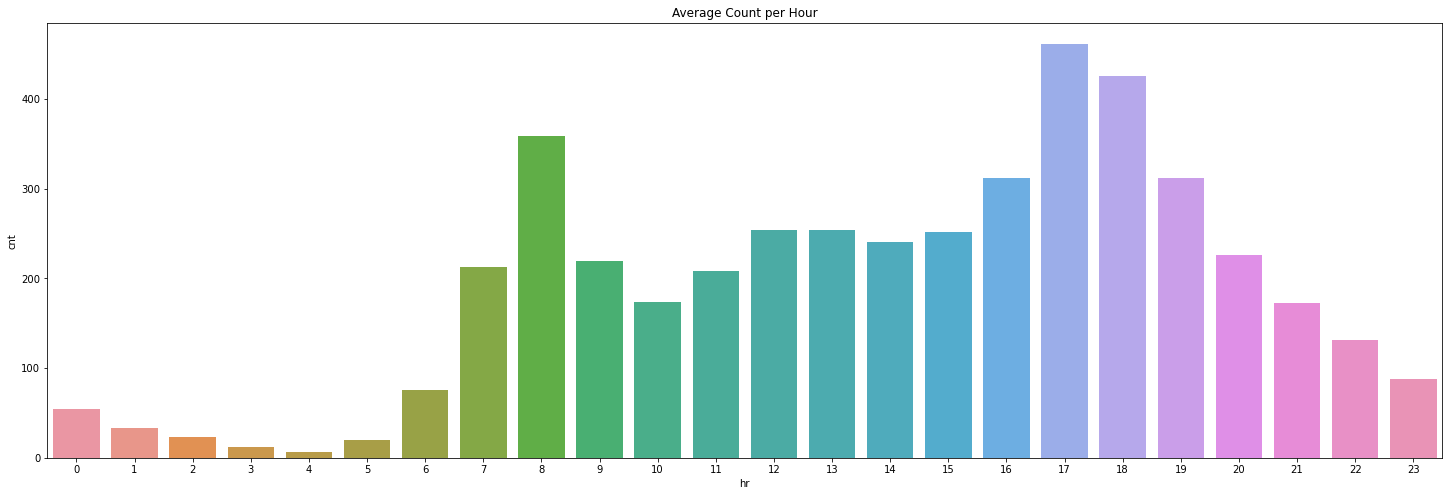

In [120]:
plt.figure(figsize=(25,8))
sns.barplot('hr','cnt', data=df, ci=0)
plt.title('Average Count per Hour')
plt.show()

In [123]:
empat=6.352941
lima=19.889819
enam=76.044138
tujuh=212.064649
delapan=359.011004
peningkatan1=round((lima-empat)/empat*100,2)
peningkatan2=round((enam-lima)/lima*100,2) #=> peningkatan tertinggi rekomen jadwal storing
peningkatan3=round((tujuh-enam)/enam*100,2)
peningkatan4=round((delapan-tujuh)/tujuh*100,2)
peningkatan1, peningkatan2, peningkatan3, peningkatan4

(213.08, 282.33, 178.87, 69.29)

In [124]:
limasore=461.452055
enamsore=425.510989
tujuhmalam=311.523352
delapanmalam=226.030220
sembilanmalam=172.314560
sepuluhmalam=131.335165
turun1=round((enamsore-limasore)/limasore*100,2)
turun2=round((tujuhmalam-enamsore)/enamsore*100,2)
turun3=round((delapanmalam-tujuhmalam)/tujuhmalam*100,2) #=> penurunan tertinggi rekomen jadwal pickup
turun4=round((sembilanmalam-delapanmalam)/delapanmalam*100,2)
turun5=round((sepuluhmalam-sembilanmalam)/sembilanmalam*100,2)
turun1, turun2, turun3, turun4, turun5

(-7.79, -26.79, -27.44, -23.76, -23.78)

#### Simulation
Based on research, 90% of bike usage is within 30-60 minutes, so we can have the following storing/maintenance scenario as follows. Let's say that
- Total bikes in station at 5 am is 20
- Total bikes needed at 8 am is 360
- Total bikes needed at 5 pm  is 450
- Total bikes needed at 8 pm is 220
We want to do storing-pickup twice a day, one for adding bikes to station and one for collecting bikes from station. So, at 5 am we add 
$$
\#\text{bikes needed at 5 pm} - \#\text{bikes in station at 5 am} = 450-20 = 430
$$
and at 8 pm we collect
$$
\#\text{bikes in station at 5 pm} - \#\text{bikes needed at 8 pm}  = 450-220=230.
$$
- Since the demand above 8 pm will decrease until 4 am, then the number of bikes on the field at 8 pm must be sufficient until 5 am the next day.

<center><img src = "sim.PNG" width="500" align="center"/></center>